 # COST PREDICTION FOR ACQUIRING A CUSTOMER THROUGH MEDIA CAMPAIGN

### Group 1

### Mentor
#### Animesh Tiwari

### Members:
 * Abinaya T
 * Krishna
 * Shachin Arivalagan
 * Subha Sree M
 * Yaswanth Kumar A

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

# READING THE DATA SET

In [2]:
pd.set_option("display.max_columns",50)

In [3]:
df=pd.read_csv("media prediction and its cost.csv")
df.head()

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,total_children,education,member_card,occupation,houseowner,avg_cars_at home(approx),avg. yearly_income,num_children_at_home,avg_cars_at home(approx).1,brand_name,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,store_type,store_city,store_state,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4,Bag Stuffers,USA,M,F,1,Partial High School,Normal,Skilled Manual,Y,1,$10K - $30K,1,1,Carrington,1.84,19.70,17.70,1,0,17,Deluxe Supermarket,Salem,OR,27694,18670,5415,3610,1,1,1,1,1,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3,Cash Register Lottery,USA,M,M,0,Bachelors Degree,Silver,Professional,Y,4,$50K - $70K,0,4,Carrington,1.84,19.70,17.70,1,0,17,Deluxe Supermarket,Salem,OR,27694,18670,5415,3610,1,1,1,1,1,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2,High Roller Savings,USA,S,F,4,Partial High School,Normal,Manual,N,1,$10K - $30K,0,1,Carrington,1.84,19.70,17.70,1,0,17,Deluxe Supermarket,Salem,OR,27694,18670,5415,3610,1,1,1,1,1,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2,Cash Register Lottery,USA,M,F,2,High School Degree,Bronze,Manual,Y,2,$30K - $50K,2,2,Carrington,1.84,19.70,17.70,1,0,17,Deluxe Supermarket,Salem,OR,27694,18670,5415,3610,1,1,1,1,1,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3,Double Down Sale,USA,M,M,0,Partial High School,Bronze,Skilled Manual,N,2,$30K - $50K,0,2,Golden,1.36,7.12,5.11,0,1,29,Deluxe Supermarket,Salem,OR,27694,18670,5415,3610,1,1,1,1,1,Radio,50.79


# UNDERSTANDING AND INFORMATIONS OF THE DATA SET

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   food_category               60428 non-null  object 
 1   food_department             60428 non-null  object 
 2   food_family                 60428 non-null  object 
 3   store_sales(in millions)    60428 non-null  float64
 4   store_cost(in millions)     60428 non-null  float64
 5   unit_sales(in millions)     60428 non-null  int64  
 6   promotion_name              60428 non-null  object 
 7   sales_country               60428 non-null  object 
 8   marital_status              60428 non-null  object 
 9   gender                      60428 non-null  object 
 10  total_children              60428 non-null  int64  
 11  education                   60428 non-null  object 
 12  member_card                 60428 non-null  object 
 13  occupation                  604

* There are 23 numerical and 17 categorical columns

In [5]:
# Converting categorical columns which are wrongly identified as numerical

df['recyclable_package']=df['recyclable_package'].astype('object')
df['low_fat']=df['low_fat'].astype('object')
df['coffee_bar']=df['coffee_bar'].astype('object')
df['video_store']=df['video_store'].astype('object')
df['salad_bar']=df['salad_bar'].astype('object')
df['prepared_food']=df['prepared_food'].astype('object')
df['florist']=df['florist'].astype('object')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   food_category               60428 non-null  object 
 1   food_department             60428 non-null  object 
 2   food_family                 60428 non-null  object 
 3   store_sales(in millions)    60428 non-null  float64
 4   store_cost(in millions)     60428 non-null  float64
 5   unit_sales(in millions)     60428 non-null  int64  
 6   promotion_name              60428 non-null  object 
 7   sales_country               60428 non-null  object 
 8   marital_status              60428 non-null  object 
 9   gender                      60428 non-null  object 
 10  total_children              60428 non-null  int64  
 11  education                   60428 non-null  object 
 12  member_card                 60428 non-null  object 
 13  occupation                  604

* After conversion, there are 15 numerical and 25 categorical columns

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
store_sales(in millions),60428.0,6.541031,3.463047,0.5100,3.81,5.9400,8.670000,22.9200
store_cost(in millions),60428.0,2.619460,1.453009,0.1632,1.50,2.3856,3.484025,9.7265
unit_sales(in millions),60428.0,3.093169,0.827677,1.0000,3.00,3.0000,4.000000,6.0000
total_children,60428.0,2.533875,1.490165,0.0000,1.00,3.0000,4.000000,5.0000
avg_cars_at home(approx),60428.0,2.200271,1.109644,0.0000,1.00,2.0000,3.000000,4.0000
num_children_at_home,60428.0,0.829351,1.303424,0.0000,0.00,0.0000,1.000000,5.0000
avg_cars_at home(approx).1,60428.0,2.200271,1.109644,0.0000,1.00,2.0000,3.000000,4.0000
SRP,60428.0,2.115258,0.932829,0.5000,1.41,2.1300,2.790000,3.9800
gross_weight,60428.0,13.806433,4.622693,6.0000,9.70,13.6000,17.700000,21.9000
net_weight,60428.0,11.796289,4.682986,3.0500,7.71,11.6000,16.000000,20.8000


# Checking for duplicates

In [8]:
df[df.duplicated()]

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,total_children,education,member_card,occupation,houseowner,avg_cars_at home(approx),avg. yearly_income,num_children_at_home,avg_cars_at home(approx).1,brand_name,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,store_type,store_city,store_state,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost


* No duplicate rows

In [9]:
df.T.duplicated()

food_category                 False
food_department               False
food_family                   False
store_sales(in millions)      False
store_cost(in millions)       False
unit_sales(in millions)       False
promotion_name                False
sales_country                 False
marital_status                False
gender                        False
total_children                False
education                     False
member_card                   False
occupation                    False
houseowner                    False
avg_cars_at home(approx)      False
avg. yearly_income            False
num_children_at_home          False
avg_cars_at home(approx).1     True
brand_name                    False
SRP                           False
gross_weight                  False
net_weight                    False
recyclable_package            False
low_fat                       False
units_per_case                False
store_type                    False
store_city                  

In [10]:
# duplicate column avg_cars_at home(approx), we can drop it
df.drop("avg_cars_at home(approx).1",axis=1,inplace=True)
df.head()

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,total_children,education,member_card,occupation,houseowner,avg_cars_at home(approx),avg. yearly_income,num_children_at_home,brand_name,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,store_type,store_city,store_state,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4,Bag Stuffers,USA,M,F,1,Partial High School,Normal,Skilled Manual,Y,1,$10K - $30K,1,Carrington,1.84,19.70,17.70,1,0,17,Deluxe Supermarket,Salem,OR,27694,18670,5415,3610,1,1,1,1,1,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3,Cash Register Lottery,USA,M,M,0,Bachelors Degree,Silver,Professional,Y,4,$50K - $70K,0,Carrington,1.84,19.70,17.70,1,0,17,Deluxe Supermarket,Salem,OR,27694,18670,5415,3610,1,1,1,1,1,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2,High Roller Savings,USA,S,F,4,Partial High School,Normal,Manual,N,1,$10K - $30K,0,Carrington,1.84,19.70,17.70,1,0,17,Deluxe Supermarket,Salem,OR,27694,18670,5415,3610,1,1,1,1,1,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2,Cash Register Lottery,USA,M,F,2,High School Degree,Bronze,Manual,Y,2,$30K - $50K,2,Carrington,1.84,19.70,17.70,1,0,17,Deluxe Supermarket,Salem,OR,27694,18670,5415,3610,1,1,1,1,1,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3,Double Down Sale,USA,M,M,0,Partial High School,Bronze,Skilled Manual,N,2,$30K - $50K,0,Golden,1.36,7.12,5.11,0,1,29,Deluxe Supermarket,Salem,OR,27694,18670,5415,3610,1,1,1,1,1,Radio,50.79


# Renaming columns

In [11]:
for i in df.columns:
    a=i.split("(")
    df.rename(columns={i:a[0]},inplace=True)
df.head()

,food_category,food_department,food_family,store_sales,store_cost,unit_sales,promotion_name,sales_country,marital_status,gender,total_children,education,member_card,occupation,houseowner,avg_cars_at home,avg. yearly_income,num_children_at_home,brand_name,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,store_type,store_city,store_state,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4,Bag Stuffers,USA,M,F,1,Partial High School,Normal,Skilled Manual,Y,1,$10K - $30K,1,Carrington,1.84,19.70,17.70,1,0,17,Deluxe Supermarket,Salem,OR,27694,18670,5415,3610,1,1,1,1,1,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3,Cash Register Lottery,USA,M,M,0,Bachelors Degree,Silver,Professional,Y,4,$50K - $70K,0,Carrington,1.84,19.70,17.70,1,0,17,Deluxe Supermarket,Salem,OR,27694,18670,5415,3610,1,1,1,1,1,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2,High Roller Savings,USA,S,F,4,Partial High School,Normal,Manual,N,1,$10K - $30K,0,Carrington,1.84,19.70,17.70,1,0,17,Deluxe Supermarket,Salem,OR,27694,18670,5415,3610,1,1,1,1,1,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2,Cash Register Lottery,USA,M,F,2,High School Degree,Bronze,Manual,Y,2,$30K - $50K,2,Carrington,1.84,19.70,17.70,1,0,17,Deluxe Supermarket,Salem,OR,27694,18670,5415,3610,1,1,1,1,1,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3,Double Down Sale,USA,M,M,0,Partial High School,Bronze,Skilled Manual,N,2,$30K - $50K,0,Golden,1.36,7.12,5.11,0,1,29,Deluxe Supermarket,Salem,OR,27694,18670,5415,3610,1,1,1,1,1,Radio,50.79


# Missing Values

In [12]:
df.isnull().sum()

food_category           0
food_department         0
food_family             0
store_sales             0
store_cost              0
unit_sales              0
promotion_name          0
sales_country           0
marital_status          0
gender                  0
total_children          0
education               0
member_card             0
occupation              0
houseowner              0
avg_cars_at home        0
avg. yearly_income      0
num_children_at_home    0
brand_name              0
SRP                     0
gross_weight            0
net_weight              0
recyclable_package      0
low_fat                 0
units_per_case          0
store_type              0
store_city              0
store_state             0
store_sqft              0
grocery_sqft            0
frozen_sqft             0
meat_sqft               0
coffee_bar              0
video_store             0
salad_bar               0
prepared_food           0
florist                 0
media_type              0
cost        

* No missing values found in the dataset

# Outliers Detection

In [13]:
#numerical columns
df.select_dtypes(include=np.number).columns

Index(['store_sales', 'store_cost', 'unit_sales', 'total_children',
       'avg_cars_at home', 'num_children_at_home', 'SRP', 'gross_weight',
       'net_weight', 'units_per_case', 'store_sqft', 'grocery_sqft',
       'frozen_sqft', 'meat_sqft', 'cost'],
      dtype='object')

In [14]:
df.select_dtypes(exclude=np.number).columns

Index(['food_category', 'food_department', 'food_family', 'promotion_name',
       'sales_country', 'marital_status', 'gender', 'education', 'member_card',
       'occupation', 'houseowner', 'avg. yearly_income', 'brand_name',
       'recyclable_package', 'low_fat', 'store_type', 'store_city',
       'store_state', 'coffee_bar', 'video_store', 'salad_bar',
       'prepared_food', 'florist', 'media_type'],
      dtype='object')

In [15]:
num_cols = ['store_sales', 'store_cost', 'unit_sales', 'total_children',
       'avg_cars_at home', 'num_children_at_home', 'SRP', 'gross_weight',
       'net_weight', 'units_per_case', 'store_sqft', 'grocery_sqft',
       'frozen_sqft', 'meat_sqft', 'cost']
len(num_cols)

15

In [16]:
cat_cols = ['food_category', 'food_department', 'food_family', 'promotion_name',
       'sales_country', 'marital_status', 'gender', 'education', 'member_card',
       'occupation', 'houseowner', 'avg. yearly_income', 'brand_name',
       'recyclable_package', 'low_fat', 'store_type', 'store_city',
       'store_state', 'coffee_bar', 'video_store', 'salad_bar',
       'prepared_food', 'florist', 'media_type']
len(cat_cols)

24

# Box plot (for finiding the outliers)

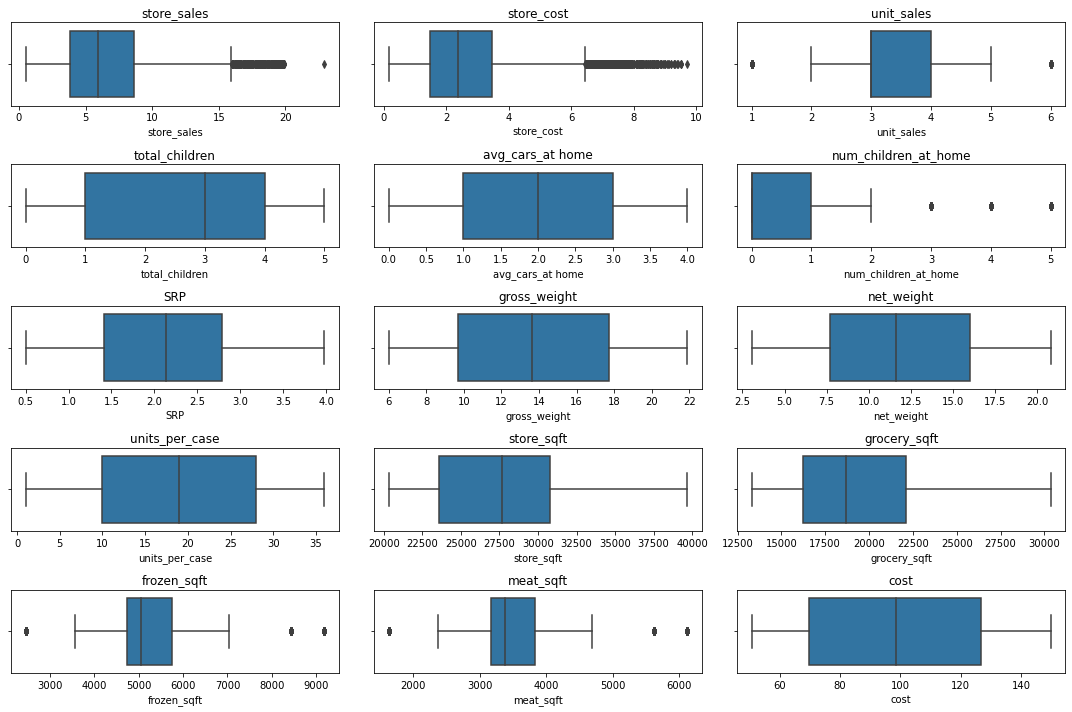

In [17]:
nrow=5
ncols=3
it=1
plt.figure(figsize=[15,10])
for i in num_cols:
    plt.subplot(nrow,ncols,it)
    sns.boxplot(data=df,x=i)
    plt.title(i)
    it +=1
plt.tight_layout()
plt.show()

# Inference
* We can find outliers in store_sales, store_cost, unit_sales,num_children_at_home,frozen_sqft,meat_sqft

In [18]:
# IQR method to find outliers

q1=df.quantile(0.25)
q3=df.quantile(0.75)

iqr = q3-q1

ll=q1-(1.5*iqr)
ul=q3+(1.5*iqr)


In [19]:
outlier_count={}
for i in num_cols:
    outlier_count.update({i:len(df[ (df[i] > ul[i]) | (df[i] < ll[i])][i])})
outlier_count

{'store_sales': 325,
 'store_cost': 986,
 'unit_sales': 890,
 'total_children': 0,
 'avg_cars_at home': 0,
 'num_children_at_home': 8167,
 'SRP': 0,
 'gross_weight': 0,
 'net_weight': 0,
 'units_per_case': 0,
 'store_sqft': 0,
 'grocery_sqft': 0,
 'frozen_sqft': 9996,
 'meat_sqft': 9996,
 'cost': 0}

In [20]:
print(f"Total outliers: {len(df[((df<ll) | (df>ul)).any(axis=1)])}")

Total outliers: 18468


# Univariate analysis

## Numerical columns

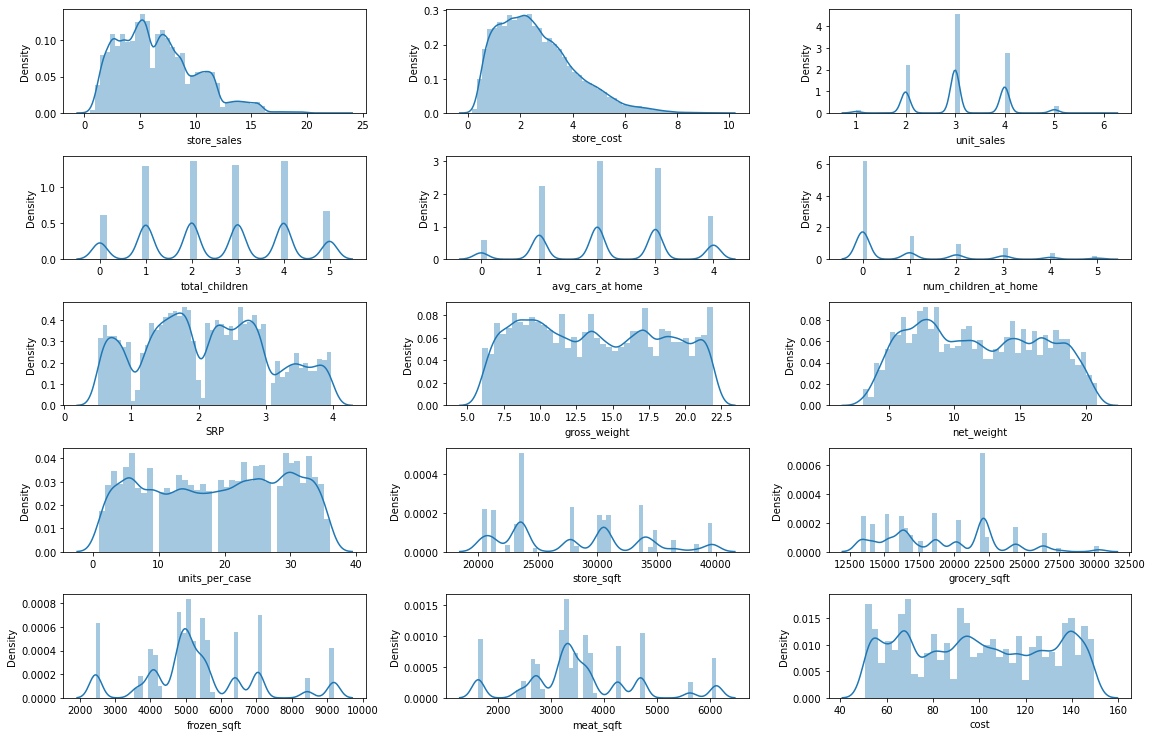

In [21]:
iterator = 1

plt.rcParams['figure.figsize']=[16,16]
for i in num_cols:
    plt.subplot(8,3,iterator)
    sns.distplot(df[i])
    iterator+=1

plt.tight_layout()
plt.show()

# Inference
*

In [22]:
df.skew()

store_sales             0.678383
store_cost              0.832920
unit_sales              0.052504
total_children         -0.014984
avg_cars_at home       -0.081572
num_children_at_home    1.554280
SRP                     0.137925
gross_weight            0.092975
net_weight              0.106678
recyclable_package     -0.236297
low_fat                 0.626989
units_per_case         -0.083627
store_sqft              0.386679
grocery_sqft            0.385314
frozen_sqft             0.561041
meat_sqft               0.561238
coffee_bar             -0.462487
video_store             0.609909
salad_bar              -0.357406
prepared_food          -0.357406
florist                -0.252406
cost                    0.037239
dtype: float64

In [23]:
df['total_children']=df['total_children'].astype('object')
df['avg_cars_at home']=df['avg_cars_at home'].astype('object')
df['num_children_at_home']=df['num_children_at_home'].astype('object')

In [24]:
cat_cols.extend(["total_children",'avg_cars_at home',"num_children_at_home"])

In [25]:
len(cat_cols)

27

In [26]:
num_cols.remove("total_children")
num_cols.remove("avg_cars_at home")
num_cols.remove("num_children_at_home")

In [27]:
len(num_cols)

12

## Categorical columns

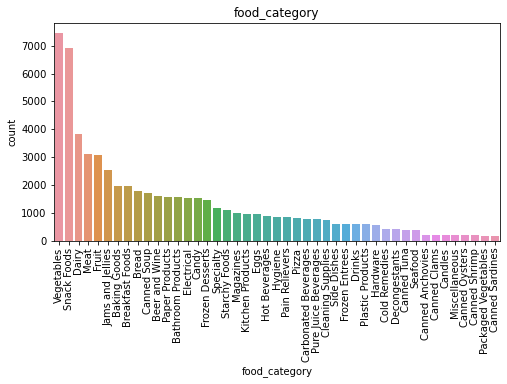

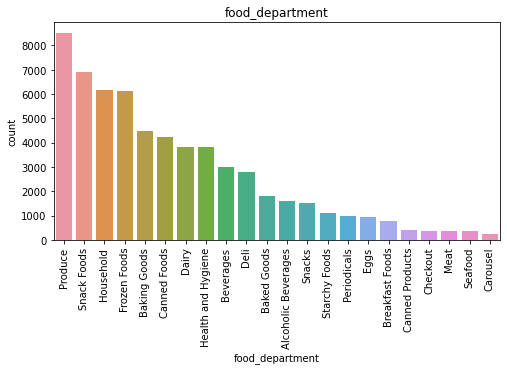

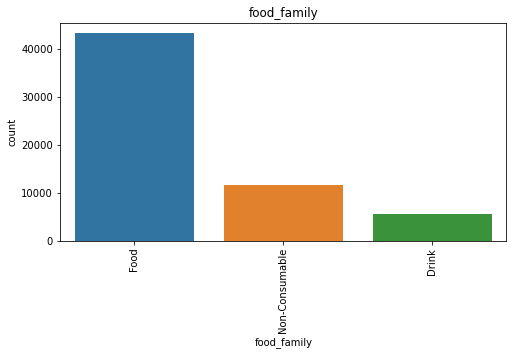

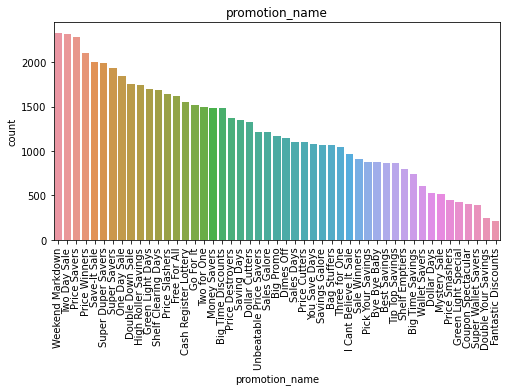

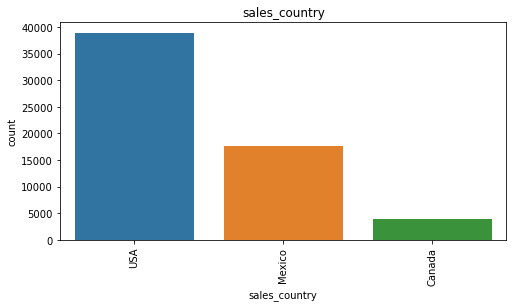

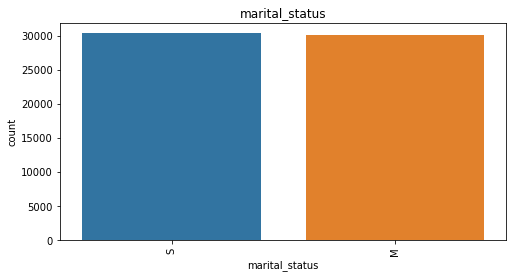

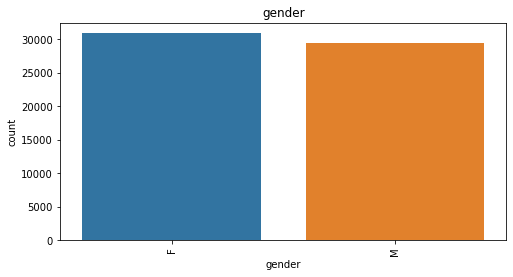

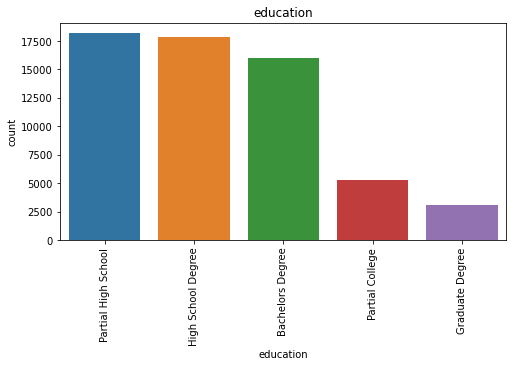

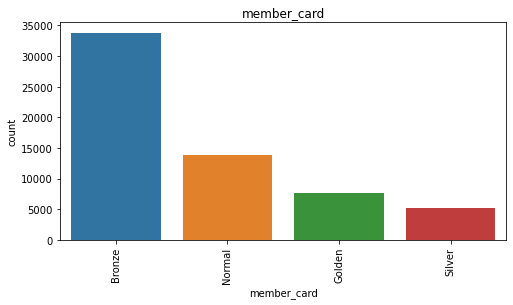

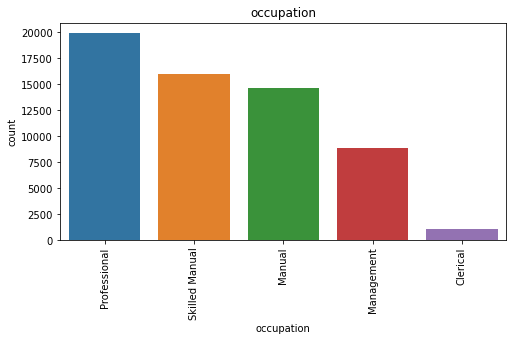

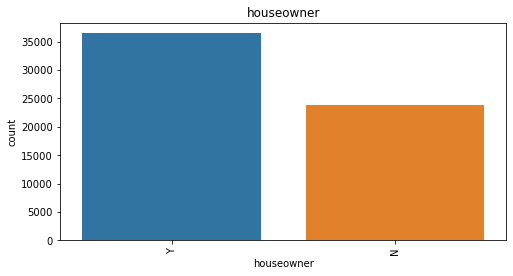

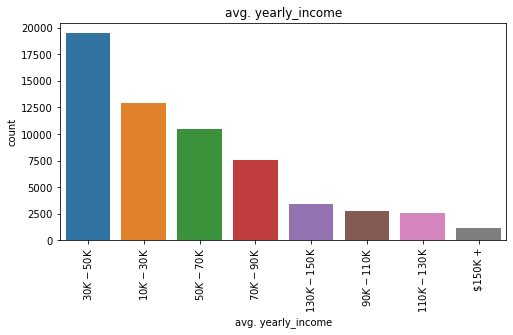

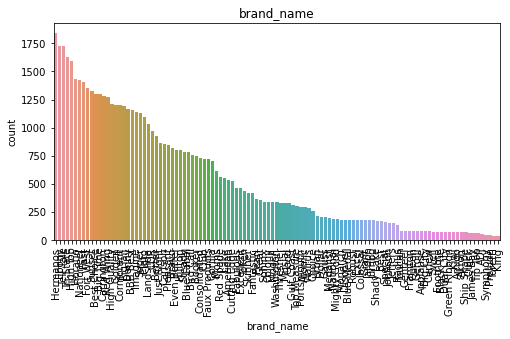

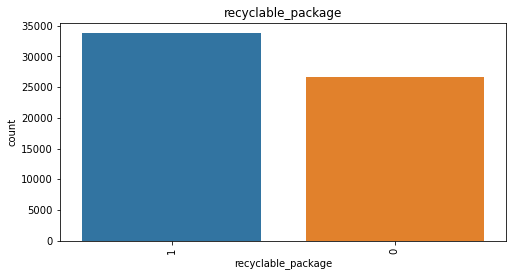

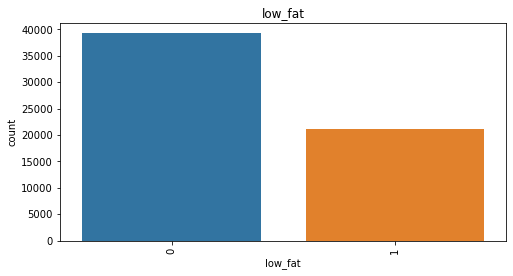

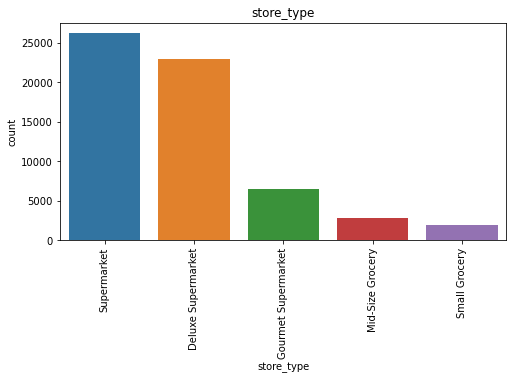

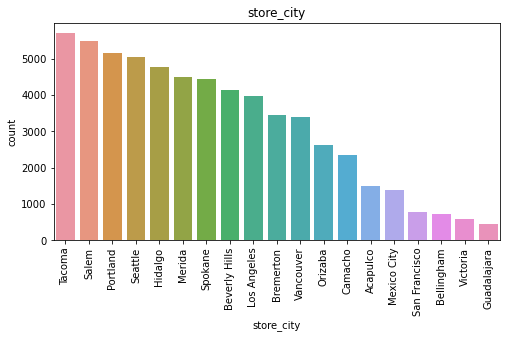

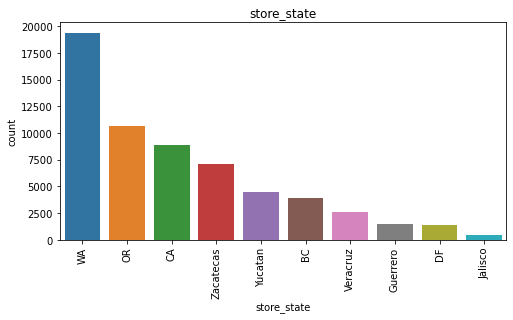

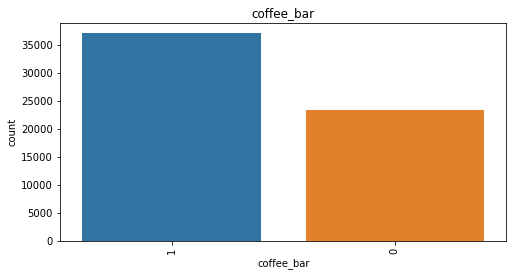

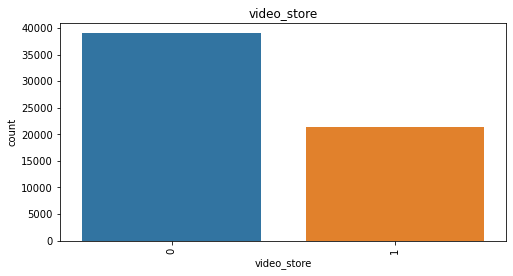

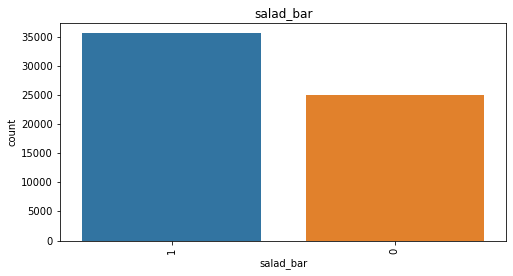

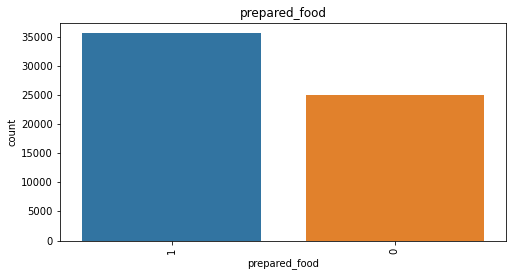

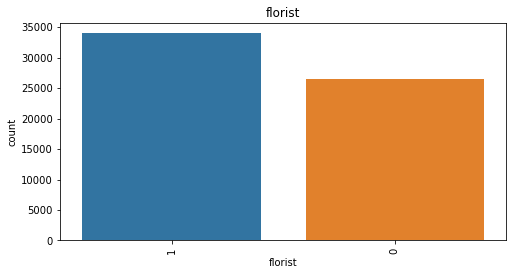

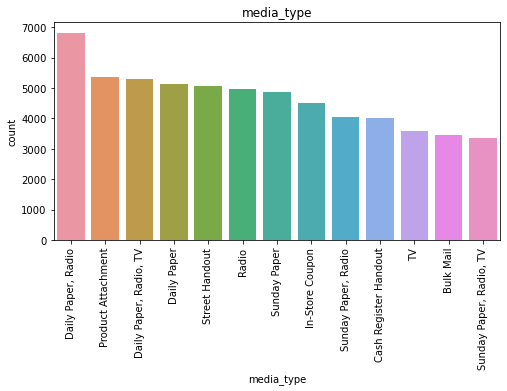

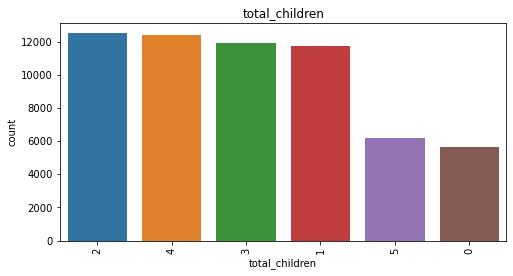

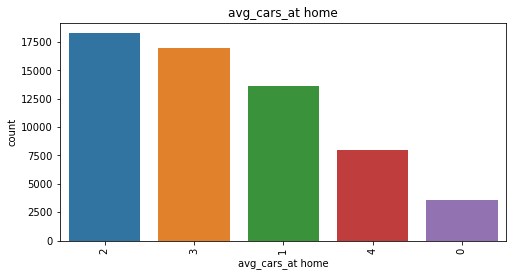

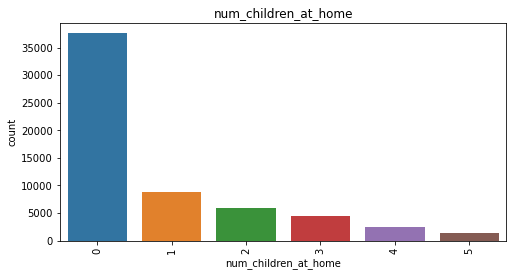

<Figure size 1152x1152 with 0 Axes>

In [28]:
for i in cat_cols:
    plt.figure(figsize=[8,4])
    sns.countplot(df[i],order = df[i].value_counts().index)
    plt.title(i)
    plt.xticks(rotation=90)
    plt.show()

plt.tight_layout()


# Bivariate analysis

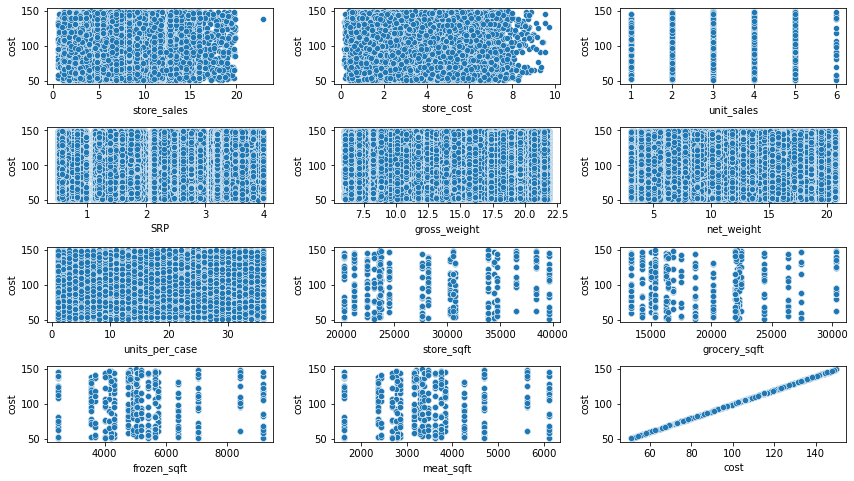

In [29]:
nrow = 5
ncols = 3
it=1
plt.figure(figsize=[12,8])

for i in num_cols:
    plt.subplot(nrow,ncols,it)
    sns.scatterplot(df[i],df["cost"])
    it+=1
    
plt.tight_layout()
plt.show()

In [30]:
cat_cols

['food_category',
 'food_department',
 'food_family',
 'promotion_name',
 'sales_country',
 'marital_status',
 'gender',
 'education',
 'member_card',
 'occupation',
 'houseowner',
 'avg. yearly_income',
 'brand_name',
 'recyclable_package',
 'low_fat',
 'store_type',
 'store_city',
 'store_state',
 'coffee_bar',
 'video_store',
 'salad_bar',
 'prepared_food',
 'florist',
 'media_type',
 'total_children',
 'avg_cars_at home',
 'num_children_at_home']

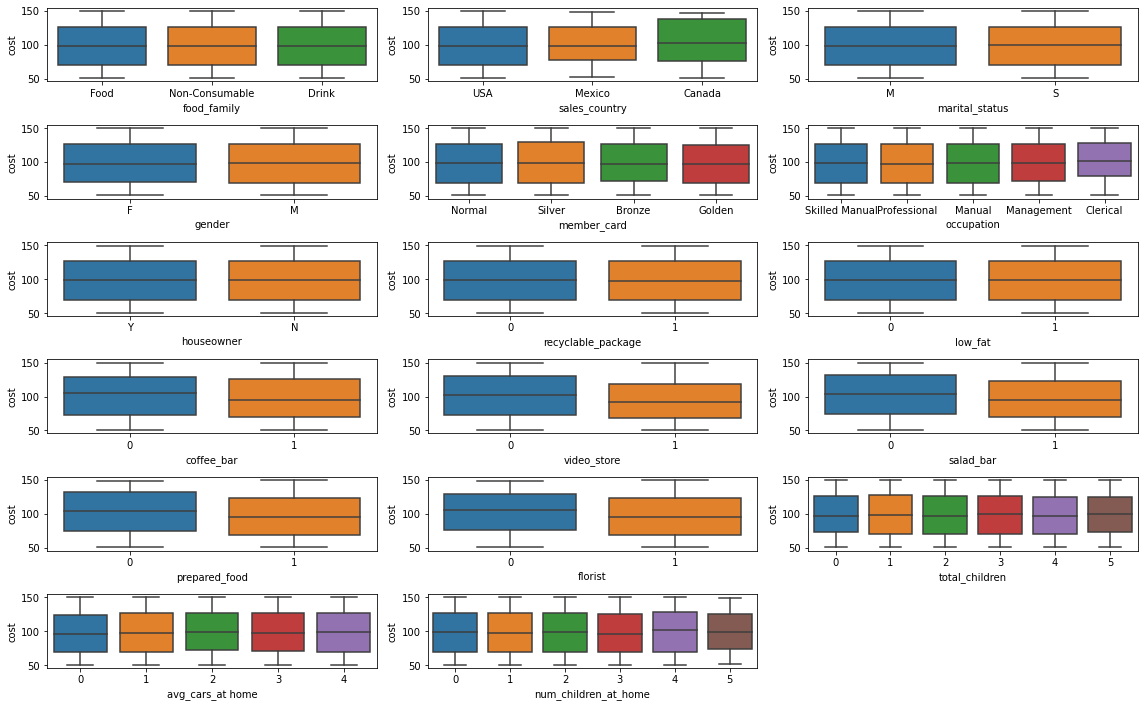

In [31]:
nrow = 10
ncols = 3
it=1

for i in cat_cols:
    
    if i not in ["food_category","food_department","brand_name","promotion_name","media_type","avg. yearly_income","education","store_city","store_type","store_state"]:
        plt.subplot(nrow,ncols,it)
        sns.boxplot(df[i],df["cost"])
        it+=1
    
plt.tight_layout()
plt.show()

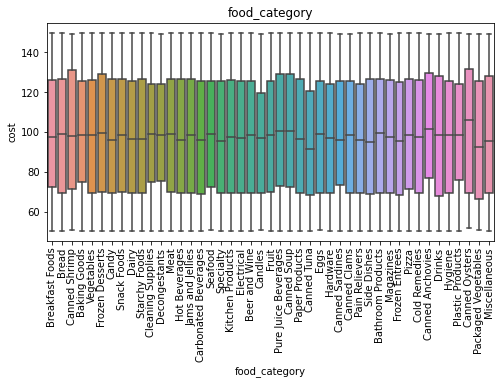

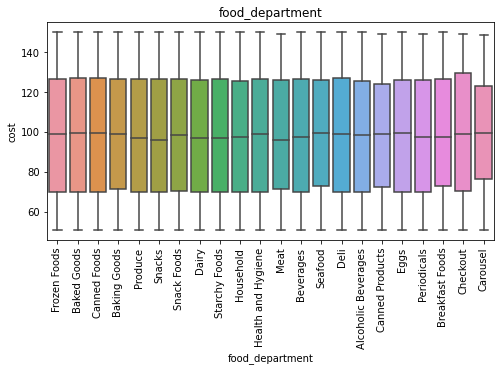

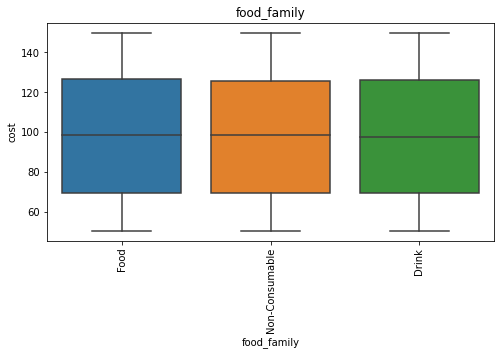

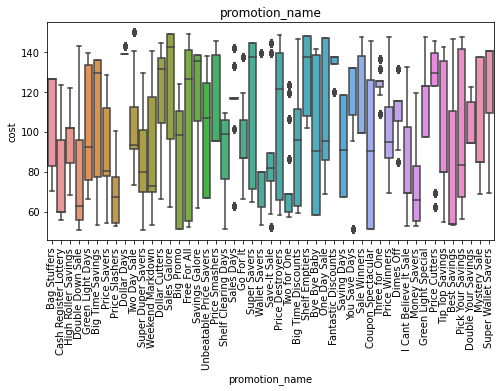

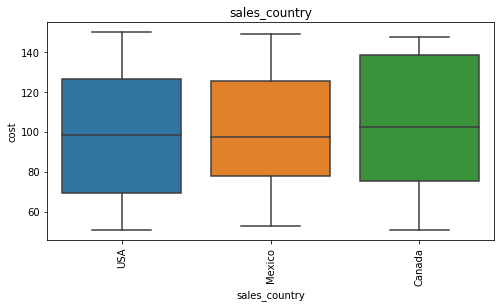

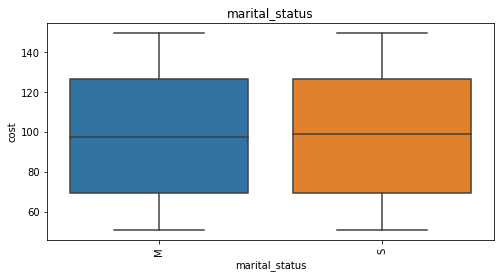

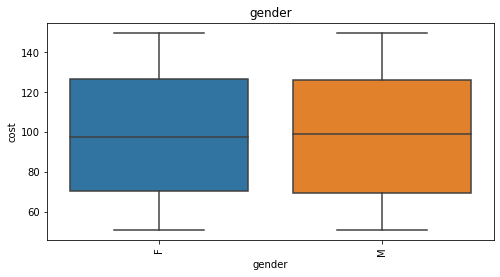

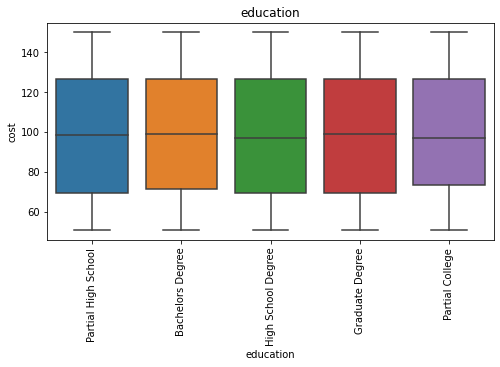

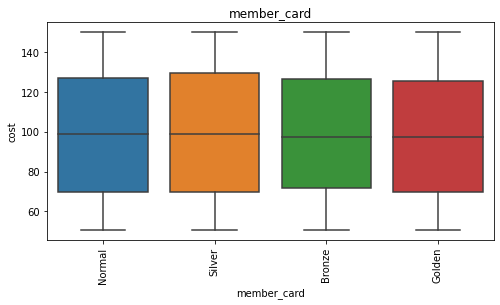

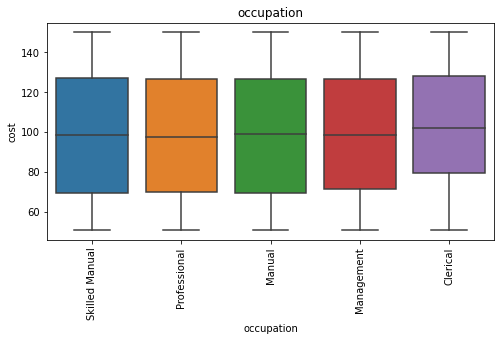

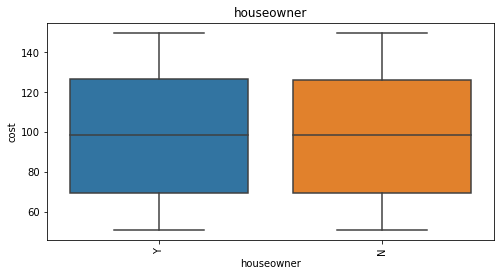

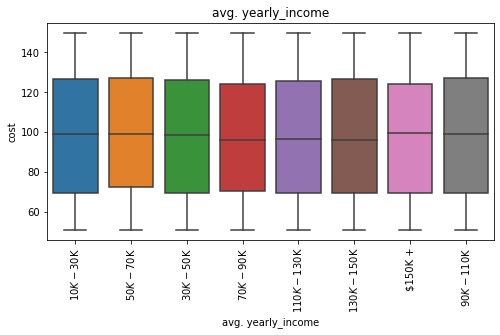

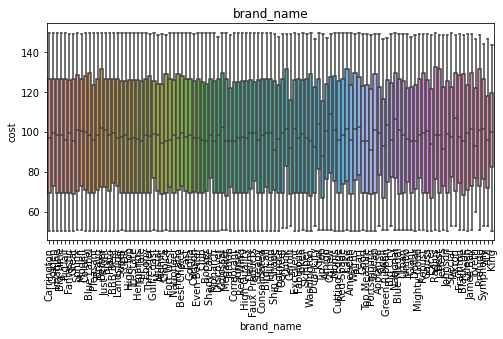

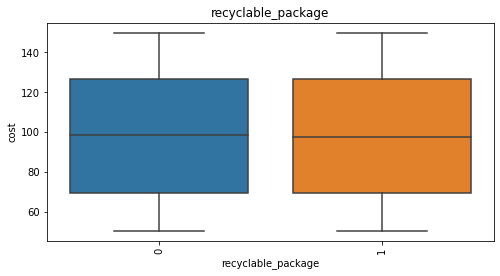

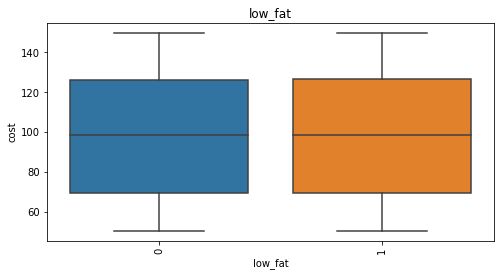

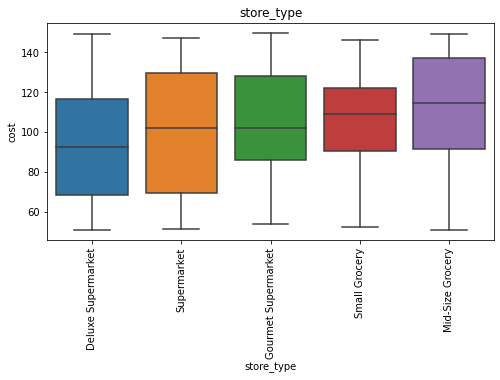

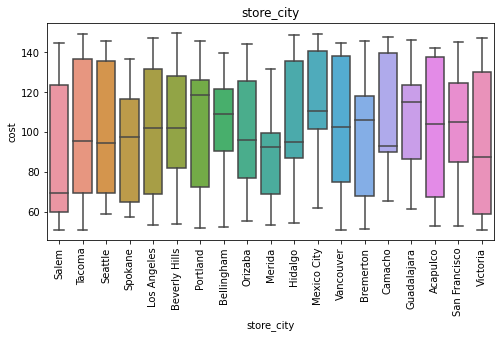

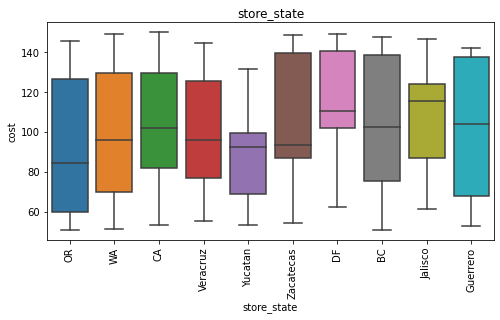

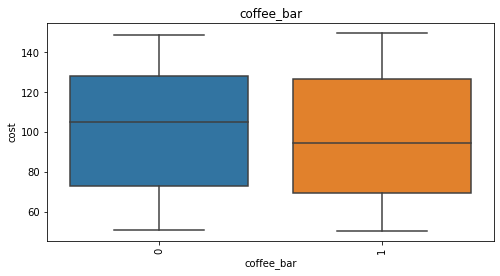

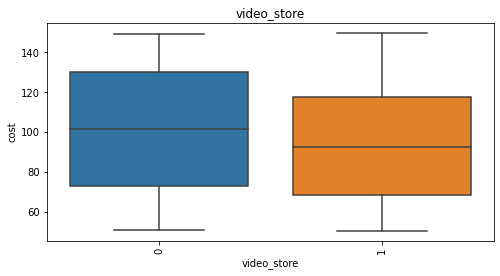

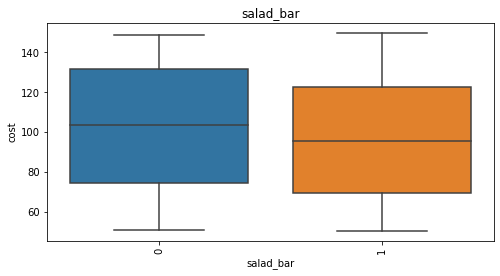

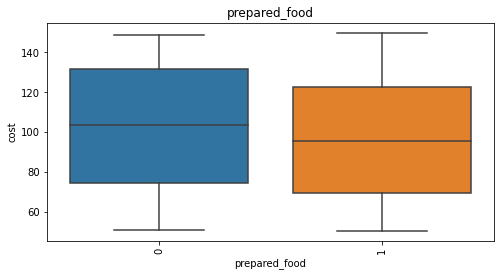

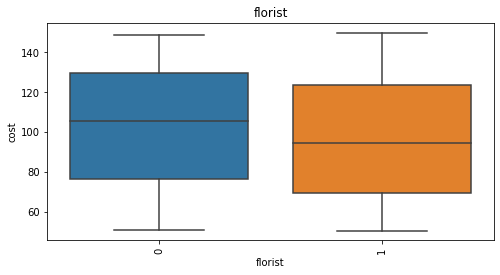

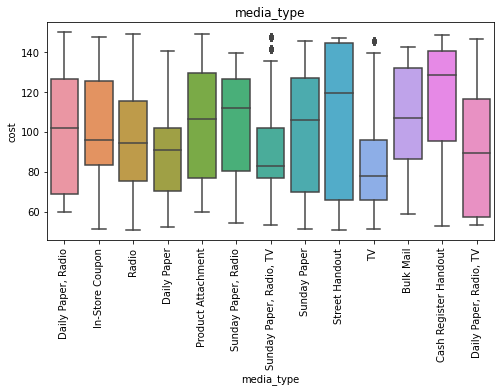

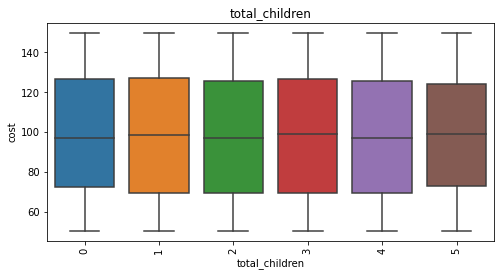

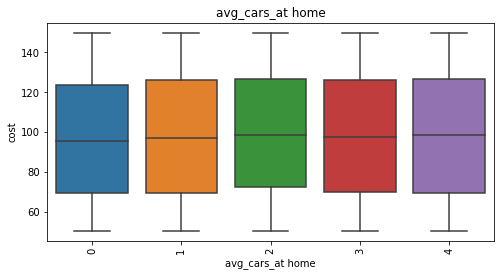

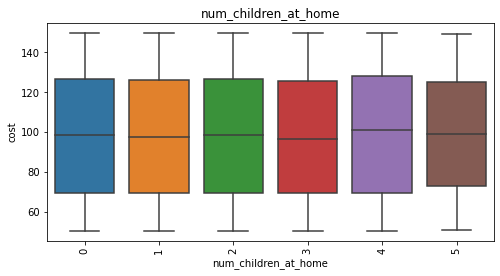

<Figure size 1152x1152 with 0 Axes>

In [32]:
for i in cat_cols:
    plt.figure(figsize=[8,4])
    sns.boxplot(df[i],df["cost"])
    plt.title(i)
    plt.xticks(rotation=90)
    plt.show()

plt.tight_layout()


In [33]:
df.groupby(["store_type"])["cost"].sum()

store_type
Deluxe Supermarket     2168901.43
Gourmet Supermarket     670793.71
Mid-Size Grocery        319121.40
Small Grocery           203304.70
Supermarket            2636105.02
Name: cost, dtype: float64

# HeatMap

<AxesSubplot:>

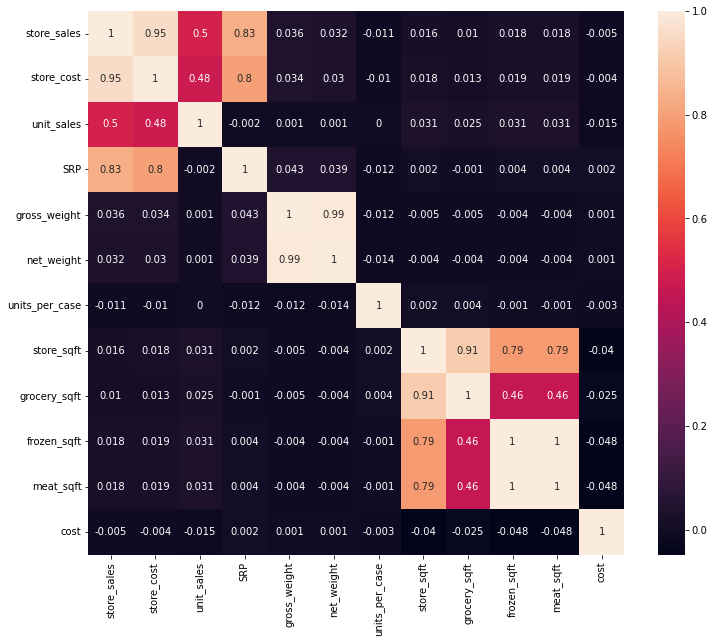

In [34]:
plt.figure(figsize=[12,10])
sns.heatmap(round(df.corr(),3),annot=True)

In [131]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=[]
for i in range(xtrain.shape[1]):
    vif.append(variance_inflation_factor(xtrain.values,i))
pd.DataFrame({"feature":xtrain.columns,"vif":vif}).sort_values(by="vif",ascending=False)

,feature,vif
33,prepared_food,inf
32,salad_bar,inf
7,store_sqft,2.143936e+09
8,grocery_sqft,1.044497e+09
9,frozen_sqft,2.434415e+08
10,meat_sqft,6.069005e+07
18,st_median,2.319176e+02
17,st_mean,1.993295e+02
13,state_mean,1.054608e+02
19,city_mean,7.174964e+01


# Feature Engineering

* creating a new feature called "children_at_home" from "num_children_at_home", which takes two values 0 (no children) and 1
(there is children at home)

In [35]:
df["children_at_home"]=df["num_children_at_home"].replace({0:0,1:1,2:1,3:1,4:1,5:1})

In [36]:
df.drop("num_children_at_home",axis=1,inplace=True)

* creating a new feature called "car_at_home" from "avg_cars_at home", which takes two values 0 (no car) and 1
(there is a car at home)

In [37]:
df["car_at home"]=df["avg_cars_at home"].replace({0:0,1:1,2:1,3:1,4:1})

In [38]:
df.drop("avg_cars_at home",axis=1,inplace=True)

* Binning income into three classes : High, Middle and Low

In [39]:
df["income_type"]=df["avg. yearly_income"].replace(
    {"$10K - $30K":"Low","$30K - $50K":"Low","$50K - $70K":"Middle","$70K - $90K":"Middle","$90K - $110K":"Middle",
     "$110K - $130K":"High","$130K - $150K":"High","$150K +":"High"})

In [40]:
df.drop("avg. yearly_income",axis=1,inplace=True)

In [41]:
df["state_mean"]=df.groupby("store_state")["cost"].transform('mean')
df["state_median"]=df.groupby("store_state")["cost"].transform('median')
df["state_max"]=df.groupby("store_state")["cost"].transform('max')
df["state_min"]=df.groupby("store_state")["cost"].transform('min')

In [42]:
df["st_mean"]=df.groupby("store_type")["cost"].transform('mean')
df["st_median"]=df.groupby("store_type")["cost"].transform('median')

In [43]:
df["city_mean"]=df.groupby("store_city")["cost"].transform('mean')
df["city_median"]=df.groupby("store_city")["cost"].transform('median')
df["city_max"]=df.groupby("store_city")["cost"].transform('max')
df["city_min"]=df.groupby("store_city")["cost"].transform('min')

In [44]:
df["pm_mean"]=df.groupby(["promotion_name","media_type"])["cost"].transform('mean')
df["pm_median"]=df.groupby(["promotion_name","media_type"])["cost"].transform('median')
df["pm_max"]=df.groupby(["promotion_name","media_type"])["cost"].transform('max')
df["pm_min"]=df.groupby(["promotion_name","media_type"])["cost"].transform('min')

In [45]:
df.corr()["cost"]

store_sales        -0.004621
store_cost         -0.004162
unit_sales         -0.015015
SRP                 0.002082
gross_weight        0.001281
net_weight          0.001343
units_per_case     -0.002776
store_sqft         -0.039656
grocery_sqft       -0.025108
frozen_sqft        -0.047971
meat_sqft          -0.047962
cost                1.000000
children_at_home   -0.002961
car_at home         0.017748
state_mean          0.159538
state_median        0.099884
state_max           0.104599
state_min           0.101518
st_mean             0.149122
st_median           0.146498
city_mean           0.225811
city_median         0.167300
city_max            0.117794
city_min            0.102701
pm_mean             0.943952
pm_median           0.924020
pm_max              0.838903
pm_min              0.868163
Name: cost, dtype: float64

<AxesSubplot:>

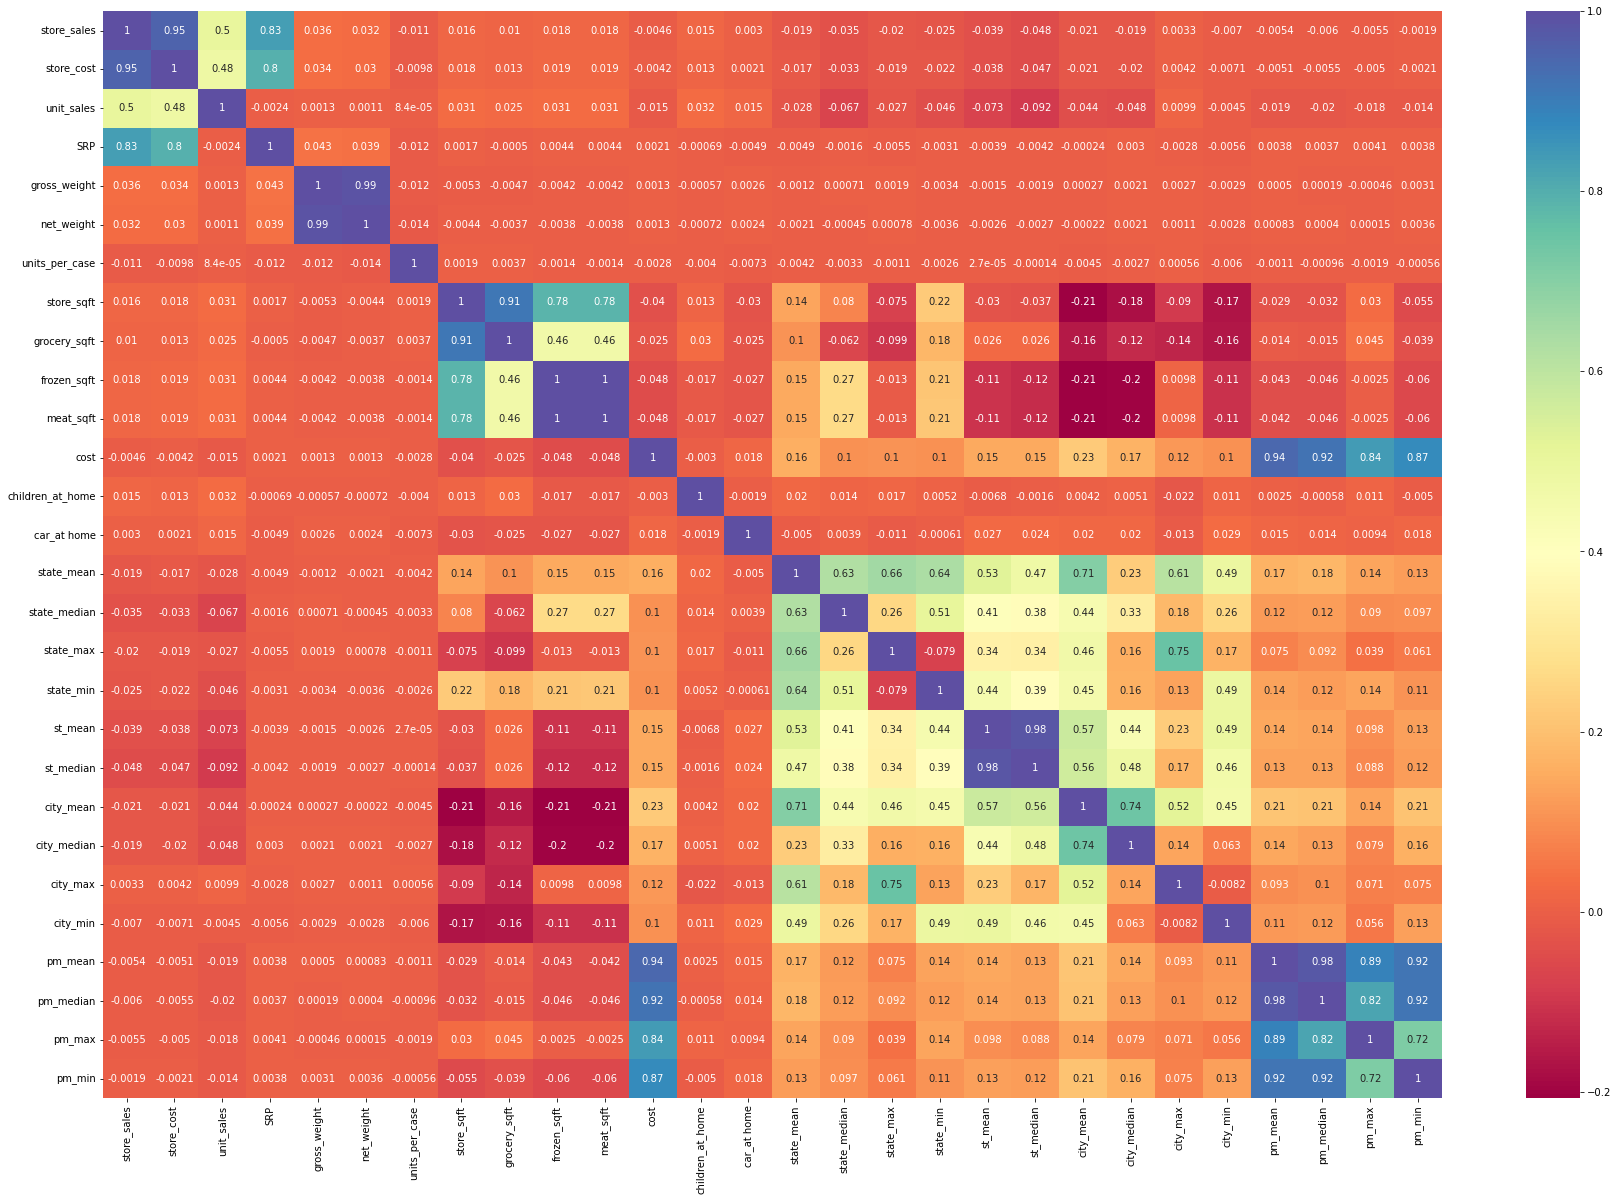

In [46]:
plt.figure(figsize=(30,20))
sns.heatmap(data=df.corr(),annot=True,cmap='Spectral')

# Statistical Test

In [47]:
df.select_dtypes(include = np.number).columns

Index(['store_sales', 'store_cost', 'unit_sales', 'SRP', 'gross_weight',
       'net_weight', 'units_per_case', 'store_sqft', 'grocery_sqft',
       'frozen_sqft', 'meat_sqft', 'cost', 'children_at_home', 'car_at home',
       'state_mean', 'state_median', 'state_max', 'state_min', 'st_mean',
       'st_median', 'city_mean', 'city_median', 'city_max', 'city_min',
       'pm_mean', 'pm_median', 'pm_max', 'pm_min'],
      dtype='object')

In [48]:
num_cols = ['store_sales', 'store_cost', 'unit_sales', 'SRP', 'gross_weight',
       'net_weight', 'units_per_case', 'store_sqft', 'grocery_sqft',
       'frozen_sqft', 'meat_sqft', 'cost', 'children_at_home', 'car_at home',
       'state_mean', 'state_median', 'state_max', 'state_min', 'st_mean',
       'st_median', 'city_mean', 'city_median', 'city_max', 'city_min','pm_mean',
       'pm_median', 'pm_max', 'pm_min']

# Linearity Test
H0: The data is normal

H1: The data is not normal

In [49]:
import scipy.stats as stats

for  i in num_cols:
    jarque_bera_test = stats.jarque_bera(df.loc[:,i])
    pvalue = round(jarque_bera_test.pvalue,2)
    print(f"Pvalue for {i} is {pvalue}")

Pvalue for store_sales is 0.0
Pvalue for store_cost is 0.0
Pvalue for unit_sales is 0.0
Pvalue for SRP is 0.0
Pvalue for gross_weight is 0.0
Pvalue for net_weight is 0.0
Pvalue for units_per_case is 0.0
Pvalue for store_sqft is 0.0
Pvalue for grocery_sqft is 0.0
Pvalue for frozen_sqft is 0.0
Pvalue for meat_sqft is 0.0
Pvalue for cost is 0.0
Pvalue for children_at_home is 0.0
Pvalue for car_at home is 0.0
Pvalue for state_mean is 0.0
Pvalue for state_median is 0.0
Pvalue for state_max is 0.0
Pvalue for state_min is 0.0
Pvalue for st_mean is 0.0
Pvalue for st_median is 0.0
Pvalue for city_mean is 0.0
Pvalue for city_median is 0.0
Pvalue for city_max is 0.0
Pvalue for city_min is 0.0
Pvalue for pm_mean is 0.0
Pvalue for pm_median is 0.0
Pvalue for pm_max is 0.0
Pvalue for pm_min is 0.0


## Inferenece
* Since the pvalue < 0.05, we reject the h0 meaning the data is not normal

# NON-PARAMETRIC TEST

## Mann whithney U Test

In [50]:
mann={"Columns":[],"Statistic_value":[],"Pvalue":[]}
for  i in num_cols:
    if i != "cost":
        mw = stats.mannwhitneyu(df.loc[:,i],df.cost)
        pv = round(mw.pvalue,3)
        st = round(mw.statistic,3)
        mann["Columns"].append(i)
        mann["Statistic_value"].append(st)
        mann["Pvalue"].append(pv)

mann_dt = pd.DataFrame(mann)
mann_dt

,Columns,Statistic_value,Pvalue
0,store_sales,0.000000e+00,0.000
1,store_cost,0.000000e+00,0.000
2,unit_sales,0.000000e+00,0.000
3,SRP,0.000000e+00,0.000
4,gross_weight,0.000000e+00,0.000
5,net_weight,0.000000e+00,0.000
6,units_per_case,0.000000e+00,0.000
7,store_sqft,3.651543e+09,0.000
8,grocery_sqft,3.651543e+09,0.000
9,frozen_sqft,3.651543e+09,0.000


# Inference
* Pvalue for "pm_mean" is 0.59, Its greater than 0.05

In [51]:
df.drop("pm_mean",axis=1,inplace=True)

# Kruskal wallis

In [52]:
statistical_krush=pd.DataFrame(columns=["Columns","Statistic value","Pvalue"])

In [53]:
statistical_krush

,Columns,Statistic value,Pvalue


In [54]:
#media_type vs cost
m1 = df.loc[df.media_type=="Daily Paper, Radio","cost"]
m2 = df.loc[df.media_type=="Product Attachment","cost"]
m3 = df.loc[df.media_type=="Daily Paper, Radio, TV","cost"]
m4 = df.loc[df.media_type=="Daily Paper","cost"]
m5 = df.loc[df.media_type=="Street Handout","cost"]
m6 = df.loc[df.media_type=="Radio","cost"]
m7 = df.loc[df.media_type=="Sunday Paper","cost"]
m8 = df.loc[df.media_type=="In-Store Coupon","cost"]
m9 = df.loc[df.media_type=="Sunday Paper, Radio","cost"]
m10 = df.loc[df.media_type=="Cash Register Handout","cost"]
m11 = df.loc[df.media_type=="TV","cost"]
m12 = df.loc[df.media_type=="Bulk Mail","cost"]
m13 = df.loc[df.media_type=="Sunday Paper, Radio, TV","cost"]

stat,pvalue=stats.kruskal(m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13)
Performance = pd.DataFrame( columns=["Columns","Statistic value","Pvalue"])
def Append(a):
    app ={}
    for i,j in zip(["Columns","Statistic value","Pvalue"] , a):
        app[i] = j
    global Performance
    Performance = Performance.append(app,ignore_index=True)
    return Performance

In [55]:
Append(["media_type",stat,pvalue])

,Columns,Statistic value,Pvalue
0,media_type,3909.698495,0.0


In [56]:
m1=df.loc[df.food_category=="Vegetables","cost"]
m2=df.loc[df.food_category=="Snack Foods","cost"]
m3=df.loc[df.food_category=='Dairy',"cost"]
m4=df.loc[df.food_category=='Meat',"cost"]
m5=df.loc[df.food_category=='Fruit',"cost"]
m6=df.loc[df.food_category=='Jams and Jellies',"cost"]
m7=df.loc[df.food_category=='Breakfast Foods',"cost"]
m8=df.loc[df.food_category=='Bread',"cost"]
m9=df.loc[df.food_category=='Canned Soup',"cost"]
m10=df.loc[df.food_category=='Beer and Wine',"cost"]
m11=df.loc[df.food_category=='Paper Products',"cost"]
m12=df.loc[df.food_category=='Bathroom Products',"cost"]
m13=df.loc[df.food_category=='Electrical',"cost"]
m14=df.loc[df.food_category=='Candy',"cost"]
m15=df.loc[df.food_category=='Frozen Desserts',"cost"]
m16=df.loc[df.food_category=='Specialty',"cost"]
m17=df.loc[df.food_category=='Starchy Foods',"cost"]
m18=df.loc[df.food_category=='Magazines',"cost"]
m19=df.loc[df.food_category=='Kitchen Products',"cost"]
m20=df.loc[df.food_category=='Eggs',"cost"]
m21=df.loc[df.food_category=='Hot Beverages',"cost"]
m22=df.loc[df.food_category=='Hygiene',"cost"]
m23=df.loc[df.food_category=='Pain Relievers',"cost"]
m24=df.loc[df.food_category=='Pizza',"cost"]
m25=df.loc[df.food_category=='Carbonated Beverages',"cost"]
m26=df.loc[df.food_category=='Pure Juice Beverages',"cost"]
m27=df.loc[df.food_category=="Cleaning Supplies","cost"]
m28=df.loc[df.food_category=='Side Dishes',"cost"]
m29=df.loc[df.food_category=='Frozen Entrees',"cost"]
m30=df.loc[df.food_category=='Drinks',"cost"]
m31=df.loc[df.food_category=='Plastic Products',"cost"]
m32=df.loc[df.food_category=='Hardware',"cost"]
m33=df.loc[df.food_category=='Cold Remedies',"cost"]
m34=df.loc[df.food_category=='Decongestants',"cost"]
m35=df.loc[df.food_category=='Canned Tuna',"cost"]
m36=df.loc[df.food_category=='Seafood',"cost"]
m37=df.loc[df.food_category=='Canned Anchovies',"cost"]
m38=df.loc[df.food_category=='Canned Clams',"cost"]
m39=df.loc[df.food_category=='Candles',"cost"]
m40=df.loc[df.food_category=='Miscellaneous',"cost"]
m41=df.loc[df.food_category=='Canned Oysters',"cost"]
m42=df.loc[df.food_category=="Canned Shrimp","cost"]
m43=df.loc[df.food_category=="Packaged Vegetables","cost"]
m44=df.loc[df.food_category=="Canned Sardines","cost"]
m45=df.loc[df.food_category=="Canned Sardines","cost"]
stat,pvalue=stats.kruskal(m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,m14,m15,m16,m17,m18,m19,m20,m21,m22,m23,m24,m25,m26,m27,m28,m29,m30,m31,m32,m33,m34,m35,m36,m37,m38,m39,m40,m41,m42,m43,
                          m44,m45)

In [57]:
Append(["food_category",stat,pvalue])

,Columns,Statistic value,Pvalue
0,media_type,3909.698495,0.0
1,food_category,45.124153,0.424724


In [58]:
m1=df.loc[df.food_department=='Frozen Foods',"cost"]
m2=df.loc[df.food_department=='Baked Goods',"cost"]
m3=df.loc[df.food_department=='Canned Foods',"cost"]
m4=df.loc[df.food_department=='Baking Goods',"cost"]
m5=df.loc[df.food_department=='Produce',"cost"]
m6=df.loc[df.food_department=='Snacks',"cost"]
m7=df.loc[df.food_department=='Snack Foods',"cost"]
m8=df.loc[df.food_department=='Dairy',"cost"]
m9=df.loc[df.food_department=='Starchy Foods',"cost"]
m10=df.loc[df.food_department=='Household',"cost"]
m11=df.loc[df.food_department=='Health and Hygiene',"cost"]
m12=df.loc[df.food_department=='Meat',"cost"]
m13=df.loc[df.food_department=='Beverages',"cost"]
m14=df.loc[df.food_department=='Seafood',"cost"]
m15=df.loc[df.food_department=='Deli',"cost"]
m17=df.loc[df.food_department=='Alcoholic Beverages',"cost"]
m18=df.loc[df.food_department=='Canned Products',"cost"]
m19=df.loc[df.food_department=='Eggs',"cost"]
m20=df.loc[df.food_department=='Periodicals',"cost"]
m21=df.loc[df.food_department=='Breakfast Foods',"cost"]
m22=df.loc[df.food_department=='Checkout',"cost"]
m23=df.loc[df.food_department=='Carousel',"cost"]
stat,pvalue=stats.kruskal(m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,m14,m15,m17,m18,m19,m20,m21,m22,m23)

In [59]:
Append(["food_department",stat,pvalue])

,Columns,Statistic value,Pvalue
0,media_type,3909.698495,0.0
1,food_category,45.124153,0.424724
2,food_department,14.218445,0.860034


In [60]:
m1=df.loc[df.food_family=='Food',"cost"]
m2=df.loc[df.food_family=='Non-Consumable',"cost"]
m3=df.loc[df.food_family=='Drink',"cost"]
stat,pvalue=stats.kruskal(m1,m2,m3)

In [61]:
Append(["food_family",stat,pvalue])

,Columns,Statistic value,Pvalue
0,media_type,3909.698495,0.0
1,food_category,45.124153,0.424724
2,food_department,14.218445,0.860034
3,food_family,1.87276,0.392044


In [62]:
m1=df.loc[df.promotion_name=='Bag Stuffers',"cost"]
m2=df.loc[df.promotion_name=='Cash Register Lottery',"cost"]
m3=df.loc[df.promotion_name=='High Roller Savings',"cost"]
m4=df.loc[df.promotion_name=='Double Down Sale',"cost"]
m5=df.loc[df.promotion_name=='Green Light Days',"cost"]
m6=df.loc[df.promotion_name=='Big Time Savings',"cost"]
m7=df.loc[df.promotion_name=='Price Savers',"cost"]
m8=df.loc[df.promotion_name=='Price Slashers',"cost"]
m9=df.loc[df.promotion_name=='Dollar Days',"cost"]
m10=df.loc[df.promotion_name=='Two Day Sale',"cost"]
m11=df.loc[df.promotion_name=='Super Duper Savers',"cost"]
m12=df.loc[df.promotion_name=='Weekend Markdown',"cost"]
m13=df.loc[df.promotion_name=='Dollar Cutters',"cost"]
m14=df.loc[df.promotion_name=='Sales Galore',"cost"]
m15=df.loc[df.promotion_name=='Unbeatable Price Savers',"cost"]
m16=df.loc[df.promotion_name=='Price Smashers',"cost"]
m17=df.loc[df.promotion_name=='Shelf Clearing Days',"cost"]
m18=df.loc[df.promotion_name=='Sales Days',"cost"]
m19=df.loc[df.promotion_name=='Go For It',"cost"]
m20=df.loc[df.promotion_name=='Super Savers',"cost"]
m21=df.loc[df.promotion_name=='Wallet Savers',"cost"]
m22=df.loc[df.promotion_name=='Save-It Sale',"cost"]
m23=df.loc[df.promotion_name=='Price Destroyers',"cost"]
m24=df.loc[df.promotion_name=='Two for One',"cost"]
m25=df.loc[df.promotion_name=='Big Time Discounts',"cost"]
m26=df.loc[df.promotion_name=='Shelf Emptiers',"cost"]
m27=df.loc[df.promotion_name=='Bye Bye Baby',"cost"]
m28=df.loc[df.promotion_name=='One Day Sale',"cost"]
m29=df.loc[df.promotion_name=='Fantastic Discounts',"cost"]
m30=df.loc[df.promotion_name=='Saving Days',"cost"]
m31=df.loc[df.promotion_name=='You Save Days',"cost"]
m32=df.loc[df.promotion_name=='Sale Winners',"cost"]
m33=df.loc[df.promotion_name=='Coupon Spectacular',"cost"]
m34=df.loc[df.promotion_name=='Three for One',"cost"]
m35=df.loc[df.promotion_name=='Price Winners',"cost"]
m36=df.loc[df.promotion_name=='Dimes Off',"cost"]
m37=df.loc[df.promotion_name=='I Cant Believe It Sale',"cost"]
m38=df.loc[df.promotion_name=='Money Savers',"cost"]
m39=df.loc[df.promotion_name=='Green Light Special',"cost"]
m40=df.loc[df.promotion_name=='Price Cutters',"cost"]
m41=df.loc[df.promotion_name=='Tip Top Savings',"cost"]
m42=df.loc[df.promotion_name=='Best Savings',"cost"]
m43=df.loc[df.promotion_name=='Pick Your Savings',"cost"]
m44=df.loc[df.promotion_name=='Double Your Savings',"cost"]
m45=df.loc[df.promotion_name=='Mystery Sale',"cost"]
m46=df.loc[df.promotion_name=='Big Promo',"cost"]
m47=df.loc[df.promotion_name=='Free For All',"cost"]
m48=df.loc[df.promotion_name=='Super Wallet Savers',"cost"]
m49=df.loc[df.promotion_name=='Savings Galore',"cost"]

stat,pvalue=stats.kruskal(m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,m14,m15,m16,m17,m18,m19,m20,m21,m22,m23,m24,m25,m26,m27,m28,m29,m30,m31,m32,m33,m34,m35,m36,m37,m38,m39,m40,m41,m42,m43,m44,m45,m46,m47,m49,m48)

In [63]:
Append(["promotion_name",stat,pvalue])

,Columns,Statistic value,Pvalue
0,media_type,3909.698495,0.0
1,food_category,45.124153,0.424724
2,food_department,14.218445,0.860034
3,food_family,1.87276,0.392044
4,promotion_name,15825.081591,0.0


In [64]:
m1=df.loc[df.sales_country=='USA',"cost"]
m2=df.loc[df.sales_country=='Mexico',"cost"]
m3=df.loc[df.sales_country=='Canada',"cost"]
stat,pvalue=stats.kruskal(m1,m2,m3)

In [65]:
Append(["sales_country",stat,pvalue])

,Columns,Statistic value,Pvalue
0,media_type,3909.698495,0.0
1,food_category,45.124153,0.424724
2,food_department,14.218445,0.860034
3,food_family,1.87276,0.392044
4,promotion_name,15825.081591,0.0
5,sales_country,101.693399,0.0


In [66]:
m1=df.loc[df.marital_status=='M',"cost"]
m2=df.loc[df.marital_status=='S',"cost"]
stat,pvalue=stats.kruskal(m1,m2)

In [67]:
Append(["marital_status",stat,pvalue])

,Columns,Statistic value,Pvalue
0,media_type,3909.698495,0.0
1,food_category,45.124153,0.424724
2,food_department,14.218445,0.860034
3,food_family,1.87276,0.392044
4,promotion_name,15825.081591,0.0
5,sales_country,101.693399,0.0
6,marital_status,0.034015,0.853674


In [68]:
m1=df.loc[df.gender=='F',"cost"]
m2=df.loc[df.gender=='M',"cost"]
stat,pvalue=stats.kruskal(m1,m2)

In [69]:
Append(["gender",stat,pvalue])

,Columns,Statistic value,Pvalue
0,media_type,3909.698495,0.0
1,food_category,45.124153,0.424724
2,food_department,14.218445,0.860034
3,food_family,1.87276,0.392044
4,promotion_name,15825.081591,0.0
5,sales_country,101.693399,0.0
6,marital_status,0.034015,0.853674
7,gender,4.23322,0.03964


In [70]:
m1=df.loc[df.education=='Partial High School',"cost"]
m2=df.loc[df.education=='Bachelors Degree',"cost"]
m3=df.loc[df.education=='High School Degree',"cost"]
m4=df.loc[df.education=='Graduate Degree',"cost"]
m5=df.loc[df.education=='Partial College',"cost"]
stat,pvalue=stats.kruskal(m1,m2,m3,m4,m5)

In [71]:
Append(["education",stat,pvalue])

,Columns,Statistic value,Pvalue
0,media_type,3909.698495,0.0
1,food_category,45.124153,0.424724
2,food_department,14.218445,0.860034
3,food_family,1.87276,0.392044
4,promotion_name,15825.081591,0.0
5,sales_country,101.693399,0.0
6,marital_status,0.034015,0.853674
7,gender,4.23322,0.03964
8,education,5.791033,0.215307


In [72]:
m1=df.loc[df.member_card=='Normal',"cost"]
m2=df.loc[df.member_card=='Silver',"cost"]
m3=df.loc[df.member_card=='Bronze',"cost"]
m4=df.loc[df.member_card=='Golden',"cost"]
stat,pvalue=stats.kruskal(m1,m2,m3,m4)

In [73]:
Append(["member_card",stat,pvalue])

,Columns,Statistic value,Pvalue
0,media_type,3909.698495,0.0
1,food_category,45.124153,0.424724
2,food_department,14.218445,0.860034
3,food_family,1.87276,0.392044
4,promotion_name,15825.081591,0.0
5,sales_country,101.693399,0.0
6,marital_status,0.034015,0.853674
7,gender,4.23322,0.03964
8,education,5.791033,0.215307
9,member_card,3.374315,0.337433


In [74]:
m1=df.loc[df.occupation=='Skilled Manual',"cost"]
m2=df.loc[df.occupation=='Professional',"cost"]
m3=df.loc[df.occupation=='Manual',"cost"]
m4=df.loc[df.occupation=='Management',"cost"]
m5=df.loc[df.occupation=='Clerical',"cost"]
stat,pvalue=stats.kruskal(m1,m2,m3,m4,m5)

In [75]:
Append(["occupation",stat,pvalue])

,Columns,Statistic value,Pvalue
0,media_type,3909.698495,0.0
1,food_category,45.124153,0.424724
2,food_department,14.218445,0.860034
3,food_family,1.87276,0.392044
4,promotion_name,15825.081591,0.0
5,sales_country,101.693399,0.0
6,marital_status,0.034015,0.853674
7,gender,4.23322,0.03964
8,education,5.791033,0.215307
9,member_card,3.374315,0.337433


In [76]:
m1=df.loc[df.houseowner=='Y',"cost"]
m2=df.loc[df.houseowner=='N',"cost"]
stat,pvalue=stats.kruskal(m1,m2)
Append(["houseowner",stat,pvalue])

,Columns,Statistic value,Pvalue
0,media_type,3909.698495,0.0
1,food_category,45.124153,0.424724
2,food_department,14.218445,0.860034
3,food_family,1.87276,0.392044
4,promotion_name,15825.081591,0.0
5,sales_country,101.693399,0.0
6,marital_status,0.034015,0.853674
7,gender,4.23322,0.03964
8,education,5.791033,0.215307
9,member_card,3.374315,0.337433


In [77]:
m1=df.loc[df.brand_name=="Hermanos","cost"]
m2=df.loc[df.brand_name=="Ebony","cost"]
m3=df.loc[df.brand_name=="Tell Tale","cost"]
m4=df.loc[df.brand_name=="Tri-State","cost"]
m5=df.loc[df.brand_name=="High Top","cost"]
m6=df.loc[df.brand_name=="Horatio","cost"]
m7=df.loc[df.brand_name=="Nationeel","cost"]
m8=df.loc[df.brand_name=="Fast","cost"]
m9=df.loc[df.brand_name=="Fort West","cost"]
m10=df.loc[df.brand_name=="Sunset","cost"]
m11=df.loc[df.brand_name=="Best Choice","cost"]
m12=df.loc[df.brand_name=="Big Time","cost"]
m13=df.loc[df.brand_name=="Carrington","cost"]
m14=df.loc[df.brand_name=="Red Wing","cost"]
m15=df.loc[df.brand_name=="High Quality","cost"]
m16=df.loc[df.brand_name=="Golden","cost"]
m17=df.loc[df.brand_name=="Cormorant","cost"]
m18=df.loc[df.brand_name=="PigTail","cost"]
m19=df.loc[df.brand_name=="Denny","cost"]
m20=df.loc[df.brand_name=="BBB Best","cost"]
m21=df.loc[df.brand_name=="Imagine","cost"]
m22=df.loc[df.brand_name=="Super","cost"]
m23=df.loc[df.brand_name=="Plato","cost"]
m24=df.loc[df.brand_name=="Landslide","cost"]
m25=df.loc[df.brand_name=="CDR","cost"]
m26=df.loc[df.brand_name=="Better","cost"]
m27=df.loc[df.brand_name=="Just Right","cost"]
m28=df.loc[df.brand_name=="Carlson","cost"]
m29=df.loc[df.brand_name=="Pleasant","cost"]
m30=df.loc[df.brand_name=="Bravo","cost"]
m31=df.loc[df.brand_name=="Even Better","cost"]
m32=df.loc[df.brand_name=="Hilltop","cost"]
m33=df.loc[df.brand_name=="Steady","cost"]
m34=df.loc[df.brand_name=="Blue Label","cost"]
m35=df.loc[df.brand_name=="Bird Call","cost"]
m36=df.loc[df.brand_name=="Booker","cost"]
m37=df.loc[df.brand_name=="Consolidated","cost"]
m38=df.loc[df.brand_name=="Club","cost"]
m39=df.loc[df.brand_name=="Faux Products","cost"]
m40=df.loc[df.brand_name=="Gorilla","cost"]
m41=df.loc[df.brand_name=="Moms","cost"]
m42=df.loc[df.brand_name=="Red Spade","cost"]
m43=df.loc[df.brand_name=="Lake","cost"]
m44=df.loc[df.brand_name=="American","cost"]
m45=df.loc[df.brand_name=="Cutting Edge","cost"]
m46=df.loc[df.brand_name=="Fabulous","cost"]
m47=df.loc[df.brand_name=="Excellent","cost"]
m48=df.loc[df.brand_name=="Token","cost"]
m49=df.loc[df.brand_name=="Skinner","cost"]
m50=df.loc[df.brand_name=="Fantastic","cost"]
m51=df.loc[df.brand_name=="Pearl","cost"]
m52=df.loc[df.brand_name=="Great","cost"]
m53=df.loc[df.brand_name=="Sphinx","cost"]
m54=df.loc[df.brand_name=="Colony","cost"]
m55=df.loc[df.brand_name=="Modell","cost"]
m56=df.loc[df.brand_name=="Washington","cost"]
m57=df.loc[df.brand_name=="Thresher","cost"]
m58=df.loc[df.brand_name=="Musial","cost"]
m59=df.loc[df.brand_name=="Good","cost"]
m60=df.loc[df.brand_name=="Gulf Coast","cost"]
m61=df.loc[df.brand_name=="Top Measure","cost"]
m62=df.loc[df.brand_name=="Portsmouth","cost"]
m63=df.loc[df.brand_name=="Atomic","cost"]
m64=df.loc[df.brand_name=="Walrus","cost"]
m65=df.loc[df.brand_name=="Choice","cost"]
m66=df.loc[df.brand_name=="Urban","cost"]
m67=df.loc[df.brand_name=="Dollar","cost"]
m68=df.loc[df.brand_name=="Gauss","cost"]
m69=df.loc[df.brand_name=="Medalist","cost"]
m70=df.loc[df.brand_name=="National","cost"]
m71=df.loc[df.brand_name=="Mighty Good","cost"]
m72=df.loc[df.brand_name=="Monarch","cost"]
m73=df.loc[df.brand_name=="Discover","cost"]
m74=df.loc[df.brand_name=="Blue Medal","cost"]
m75=df.loc[df.brand_name=="Robust","cost"]
m76=df.loc[df.brand_name=="Excel","cost"]
m77=df.loc[df.brand_name=="Colossal","cost"]
m78=df.loc[df.brand_name=="Giant","cost"]
m79=df.loc[df.brand_name=="Jardon","cost"]
m80=df.loc[df.brand_name=="Jumbo","cost"]
m81=df.loc[df.brand_name=="Shady Lake","cost"]
m82=df.loc[df.brand_name=="Best","cost"]
m83=df.loc[df.brand_name=="Special","cost"]
m84=df.loc[df.brand_name=="Johnson","cost"]
m85=df.loc[df.brand_name=="Jeffers","cost"]
m86=df.loc[df.brand_name=="Radius","cost"]
m87=df.loc[df.brand_name=="Toucan","cost"]
m88=df.loc[df.brand_name=="Genteel","cost"]
m89=df.loc[df.brand_name=="Framton","cost"]
m90=df.loc[df.brand_name=="Queen","cost"]
m91=df.loc[df.brand_name=="Gerolli","cost"]
m92=df.loc[df.brand_name=="Applause","cost"]
m93=df.loc[df.brand_name=="Big City","cost"]
m94=df.loc[df.brand_name=="Curlew","cost"]
m95=df.loc[df.brand_name=="Swell","cost"]
m96=df.loc[df.brand_name=="Footnote","cost"]
m97=df.loc[df.brand_name=="Black Tie","cost"]
m98=df.loc[df.brand_name=="Dual City","cost"]
m99=df.loc[df.brand_name=="Green Ribbon","cost"]
m100=df.loc[df.brand_name=="Kiwi","cost"]
m101=df.loc[df.brand_name=="Amigo","cost"]
m102=df.loc[df.brand_name=="Akron","cost"]
m103=df.loc[df.brand_name=="Ship Shape","cost"]
m104=df.loc[df.brand_name=="Quick","cost"]
m105=df.loc[df.brand_name=="James Bay","cost"]
m106=df.loc[df.brand_name=="Tip Top","cost"]
m107=df.loc[df.brand_name=="ADJ","cost"]
m108=df.loc[df.brand_name=="Symphony","cost"]
m109=df.loc[df.brand_name=="Prelude","cost"]
m110=df.loc[df.brand_name=="Toretti","cost"]
m111=df.loc[df.brand_name=="King","cost"]

stat,pvalue=stats.kruskal(m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,m14,m15,m16,m17,m18,m19,m20,m21,m22,m23,m24,m25,m26,m27,m28,m29,m30,m31,m32,m33,m34,m35,m36,m37,m38,m39,m40,m41,m42,m43,m44,m45,m46,m47,m49,m48,m49,m50,m51,m52,m53,m54,m55,m56,m57,m58,m59,m60,m61,m62,m63,m64,m65,m66,m67,m68,m69,m70,m71,m72,m73,m74,m75,m76,m77,m78,m79,m80,m81,m82,m83,m84,m85,m86,m87,m88,m89,m90,m91,m92,m93,m94,m95,m96,m97,m98,m99,m100,m101,m102,m103,m104,m105,m106,m107,m108,m109,m110,m111)
Append(["brand_name",stat,pvalue])

,Columns,Statistic value,Pvalue
0,media_type,3909.698495,0.0
1,food_category,45.124153,0.424724
2,food_department,14.218445,0.860034
3,food_family,1.87276,0.392044
4,promotion_name,15825.081591,0.0
5,sales_country,101.693399,0.0
6,marital_status,0.034015,0.853674
7,gender,4.23322,0.03964
8,education,5.791033,0.215307
9,member_card,3.374315,0.337433


In [78]:
import scipy.stats as stats
m1=df.loc[df.store_type=="Deluxe Supermarket","cost"]
m2=df.loc[df.store_type=="Supermarket","cost"]
m3=df.loc[df.store_type=="Gourmet Supermarket","cost"]
m4=df.loc[df.store_type=="Small Grocery","cost"]
m5=df.loc[df.store_type=="Mid-Size Grocery","cost"]
stat,pvalue=stats.kruskal(m1,m2,m3,m4,m5)
Append(["store_type",stat,pvalue])

,Columns,Statistic value,Pvalue
0,media_type,3909.698495,0.0
1,food_category,45.124153,0.424724
2,food_department,14.218445,0.860034
3,food_family,1.87276,0.392044
4,promotion_name,15825.081591,0.0
5,sales_country,101.693399,0.0
6,marital_status,0.034015,0.853674
7,gender,4.23322,0.03964
8,education,5.791033,0.215307
9,member_card,3.374315,0.337433


In [79]:
cat_cols= df.select_dtypes(include="object")

In [80]:
cat_cols.store_city.value_counts().to_frame()

,store_city
Tacoma,5704
Salem,5478
Portland,5150
Seattle,5051
Hidalgo,4761
Merida,4498
Spokane,4453
Beverly Hills,4151
Los Angeles,3960
Bremerton,3451


In [81]:
m1=df.loc[df.store_city=="Deluxe Supermarket","cost"]

In [82]:
m2=df.loc[df.brand_name=="Ebony ","cost"]
m2

Series([], Name: cost, dtype: float64)

In [83]:
m1=df.loc[df.store_city=="Tacoma","cost"]
m2=df.loc[df.store_city=="Salem","cost"]
m3=df.loc[df.store_city=="Portland","cost"]
m4=df.loc[df.store_city=="Seattle","cost"]
m5=df.loc[df.store_city=="Hidalgo","cost"]
m6=df.loc[df.store_city=="Merida","cost"]
m7=df.loc[df.store_city=="Spokane","cost"]
m8=df.loc[df.store_city=="Beverly Hills","cost"]
m9=df.loc[df.store_city=="Los Angeles","cost"]
m10=df.loc[df.store_city=="Bremerton","cost"]
m11=df.loc[df.store_city=="Vancouver","cost"]
m12=df.loc[df.store_city=="Orizaba","cost"]
m13=df.loc[df.store_city=="Camacho","cost"]
m14=df.loc[df.store_city=="Acapulco","cost"]
m15=df.loc[df.store_city=="Mexico City","cost"]
m16=df.loc[df.store_city=="San Francisco","cost"]
m17=df.loc[df.store_city=="Bellingham","cost"]
m18=df.loc[df.store_city=="Victoria","cost"]
m19=df.loc[df.store_city=="Guadalajara","cost"]

stat,pvalue=stats.kruskal(m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,m14,m15,m16,m17,m18,m19)
Append(["store_city",stat,pvalue])

,Columns,Statistic value,Pvalue
0,media_type,3909.698495,0.0
1,food_category,45.124153,0.424724
2,food_department,14.218445,0.860034
3,food_family,1.87276,0.392044
4,promotion_name,15825.081591,0.0
5,sales_country,101.693399,0.0
6,marital_status,0.034015,0.853674
7,gender,4.23322,0.03964
8,education,5.791033,0.215307
9,member_card,3.374315,0.337433


In [84]:
cat_cols.store_state.value_counts().to_frame()

,store_state
WA,19370
OR,10628
CA,8894
Zacatecas,7113
Yucatan,4498
BC,3964
Veracruz,2621
Guerrero,1506
DF,1395
Jalisco,439


In [85]:
m1=df.loc[df.store_state=="WA","cost"]
m2=df.loc[df.store_state=="OR","cost"]
m3=df.loc[df.store_state=="CA","cost"]
m4=df.loc[df.store_state=="Zacatecas","cost"]
m5=df.loc[df.store_state=="Yucatan","cost"]
m6=df.loc[df.store_state=="BC","cost"]
m7=df.loc[df.store_state=="Veracruz","cost"]
m8=df.loc[df.store_state=="Guerrero","cost"]
m9=df.loc[df.store_state=="DF","cost"]
m10=df.loc[df.store_state=="Jalisco","cost"]
stat,pvalue=stats.kruskal(m1,m2,m3,m4,m5,m6,m7,m8,m9,m10)
Append(["store_state",stat,pvalue])

,Columns,Statistic value,Pvalue
0,media_type,3909.698495,0.0
1,food_category,45.124153,0.424724
2,food_department,14.218445,0.860034
3,food_family,1.87276,0.392044
4,promotion_name,15825.081591,0.0
5,sales_country,101.693399,0.0
6,marital_status,0.034015,0.853674
7,gender,4.23322,0.03964
8,education,5.791033,0.215307
9,member_card,3.374315,0.337433


In [86]:
m1=df.loc[df.coffee_bar==1,"cost"]
m2=df.loc[df.coffee_bar==0,"cost"]
stat,pvalue=stats.kruskal(m1,m2)
Append(["coffee_bar",stat,pvalue])

,Columns,Statistic value,Pvalue
0,media_type,3909.698495,0.0
1,food_category,45.124153,0.424724
2,food_department,14.218445,0.860034
3,food_family,1.87276,0.392044
4,promotion_name,15825.081591,0.0
5,sales_country,101.693399,0.0
6,marital_status,0.034015,0.853674
7,gender,4.23322,0.03964
8,education,5.791033,0.215307
9,member_card,3.374315,0.337433


In [87]:
m1=df.loc[df.salad_bar==1,"cost"]
m2=df.loc[df.salad_bar==0,"cost"]
stat,pvalue=stats.kruskal(m1,m2)
Append(["salad_bar",stat,pvalue])

,Columns,Statistic value,Pvalue
0,media_type,3909.698495,0.0
1,food_category,45.124153,0.424724
2,food_department,14.218445,0.860034
3,food_family,1.87276,0.392044
4,promotion_name,15825.081591,0.0
5,sales_country,101.693399,0.0
6,marital_status,0.034015,0.853674
7,gender,4.23322,0.03964
8,education,5.791033,0.215307
9,member_card,3.374315,0.337433


In [88]:
m1=df.loc[df.video_store==1,"cost"]
m2=df.loc[df.video_store==0,"cost"]
stats.kruskal(m1,m2)
Append(["video_store",stat,pvalue])

,Columns,Statistic value,Pvalue
0,media_type,3909.698495,0.0
1,food_category,45.124153,0.424724
2,food_department,14.218445,0.860034
3,food_family,1.87276,0.392044
4,promotion_name,15825.081591,0.0
5,sales_country,101.693399,0.0
6,marital_status,0.034015,0.853674
7,gender,4.23322,0.03964
8,education,5.791033,0.215307
9,member_card,3.374315,0.337433


In [89]:
m1=df.loc[df.prepared_food==1,"cost"]
m2=df.loc[df.prepared_food==0,"cost"]
stat,pvalue=stats.kruskal(m1,m2)
Append(["salad_bar",stat,pvalue])

,Columns,Statistic value,Pvalue
0,media_type,3909.698495,0.0
1,food_category,45.124153,0.424724
2,food_department,14.218445,0.860034
3,food_family,1.87276,0.392044
4,promotion_name,15825.081591,0.0
5,sales_country,101.693399,0.0
6,marital_status,0.034015,0.853674
7,gender,4.23322,0.03964
8,education,5.791033,0.215307
9,member_card,3.374315,0.337433


In [90]:
m1=df.loc[df.florist==1,"cost"]
m2=df.loc[df.florist==0,"cost"]
stat,pvalue=stats.kruskal(m1,m2)
Append(["florist",stat,pvalue])

,Columns,Statistic value,Pvalue
0,media_type,3909.698495,0.0
1,food_category,45.124153,0.424724
2,food_department,14.218445,0.860034
3,food_family,1.87276,0.392044
4,promotion_name,15825.081591,0.0
5,sales_country,101.693399,0.0
6,marital_status,0.034015,0.853674
7,gender,4.23322,0.03964
8,education,5.791033,0.215307
9,member_card,3.374315,0.337433


In [91]:
m1=df.loc[df.recyclable_package==1,"cost"]
m2=df.loc[df.recyclable_package==0,"cost"]
stat,pvalue=stats.kruskal(m1,m2)
Append(["recyclable_package",stat,pvalue])

,Columns,Statistic value,Pvalue
0,media_type,3909.698495,0.0
1,food_category,45.124153,0.424724
2,food_department,14.218445,0.860034
3,food_family,1.87276,0.392044
4,promotion_name,15825.081591,0.0
5,sales_country,101.693399,0.0
6,marital_status,0.034015,0.853674
7,gender,4.23322,0.03964
8,education,5.791033,0.215307
9,member_card,3.374315,0.337433


In [92]:
m1=df.loc[df.low_fat==1,"cost"]
m2=df.loc[df.low_fat==0,"cost"]
stat,pvalue=stats.kruskal(m1,m2)
Append(["low_fat",stat,pvalue])

,Columns,Statistic value,Pvalue
0,media_type,3909.698495,0.0
1,food_category,45.124153,0.424724
2,food_department,14.218445,0.860034
3,food_family,1.87276,0.392044
4,promotion_name,15825.081591,0.0
5,sales_country,101.693399,0.0
6,marital_status,0.034015,0.853674
7,gender,4.23322,0.03964
8,education,5.791033,0.215307
9,member_card,3.374315,0.337433


In [93]:
m1=df.loc[df.total_children==1,"cost"]
m2=df.loc[df.total_children==0,"cost"]
m3=df.loc[df.total_children==2,"cost"]
m4=df.loc[df.total_children==3,"cost"]
m5=df.loc[df.total_children==4,"cost"]
m6=df.loc[df.total_children==5,"cost"]
stat,pvalue=stats.kruskal(m1,m2,m3,m4,m5,m6)
Append(["total_children",stat,pvalue])

,Columns,Statistic value,Pvalue
0,media_type,3909.698495,0.0
1,food_category,45.124153,0.424724
2,food_department,14.218445,0.860034
3,food_family,1.87276,0.392044
4,promotion_name,15825.081591,0.0
5,sales_country,101.693399,0.0
6,marital_status,0.034015,0.853674
7,gender,4.23322,0.03964
8,education,5.791033,0.215307
9,member_card,3.374315,0.337433


# Inference
* food_category,food_department,food_family,marital_status,member_card,education,
  brand_name,houseowner,recyclable_package,low_fat have pvalue >0.05

In [94]:
df.drop(["food_category","food_department","food_family","marital_status","member_card","education","brand_name","houseowner","recyclable_package",
               "low_fat"],axis=1,inplace=True)

# Scaling

In [95]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
num_cols=df.select_dtypes(np.number)
num_cols=pd.DataFrame(ss.fit_transform(num_cols),columns=num_cols.columns)

# Encoding

In [96]:
cat_cols = df.select_dtypes(include = "object")
cat_cols.head()

,promotion_name,sales_country,gender,total_children,occupation,store_type,store_city,store_state,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,income_type
0,Bag Stuffers,USA,F,1,Skilled Manual,Deluxe Supermarket,Salem,OR,1,1,1,1,1,"Daily Paper, Radio",Low
1,Cash Register Lottery,USA,M,0,Professional,Deluxe Supermarket,Salem,OR,1,1,1,1,1,"Daily Paper, Radio",Middle
2,High Roller Savings,USA,F,4,Manual,Deluxe Supermarket,Salem,OR,1,1,1,1,1,"Daily Paper, Radio",Low
3,Cash Register Lottery,USA,F,2,Manual,Deluxe Supermarket,Salem,OR,1,1,1,1,1,In-Store Coupon,Low
4,Double Down Sale,USA,M,0,Skilled Manual,Deluxe Supermarket,Salem,OR,1,1,1,1,1,Radio,Low


In [97]:
cat_cols["gender"]=cat_cols["gender"].replace({"F":0,"M":1})

In [98]:
cat_cols["occupation"].value_counts()

Professional      19915
Skilled Manual    15995
Manual            14624
Management         8805
Clerical           1089
Name: occupation, dtype: int64

In [99]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
cat_cols["occupation"]=LE.fit_transform(df["occupation"])

In [100]:
cat_cols['sales_country'].value_counts()

USA       38892
Mexico    17572
Canada     3964
Name: sales_country, dtype: int64

In [101]:
cat_cols['sales_country']=LE.fit_transform(cat_cols['sales_country'])

In [102]:
cat_cols["store_type"].value_counts()

Supermarket            26192
Deluxe Supermarket     22954
Gourmet Supermarket     6503
Mid-Size Grocery        2846
Small Grocery           1933
Name: store_type, dtype: int64

In [103]:
cat_cols['store_type']=LE.fit_transform(cat_cols['store_type'])

In [104]:
cat_cols["store_city"].value_counts()

Tacoma           5704
Salem            5478
Portland         5150
Seattle          5051
Hidalgo          4761
Merida           4498
Spokane          4453
Beverly Hills    4151
Los Angeles      3960
Bremerton        3451
Vancouver        3384
Orizaba          2621
Camacho          2352
Acapulco         1506
Mexico City      1395
San Francisco     783
Bellingham        711
Victoria          580
Guadalajara       439
Name: store_city, dtype: int64

In [105]:
freq_store_city=cat_cols["store_city"].value_counts(normalize=True)
freq_store_city

Tacoma           0.094393
Salem            0.090653
Portland         0.085225
Seattle          0.083587
Hidalgo          0.078788
Merida           0.074436
Spokane          0.073691
Beverly Hills    0.068693
Los Angeles      0.065533
Bremerton        0.057109
Vancouver        0.056001
Orizaba          0.043374
Camacho          0.038922
Acapulco         0.024922
Mexico City      0.023085
San Francisco    0.012958
Bellingham       0.011766
Victoria         0.009598
Guadalajara      0.007265
Name: store_city, dtype: float64

In [106]:
cat_cols["store_city"]=cat_cols["store_city"].map(freq_store_city)

In [107]:
cat_cols["media_type"].value_counts()

Daily Paper, Radio         6820
Product Attachment         5371
Daily Paper, Radio, TV     5284
Daily Paper                5119
Street Handout             5069
Radio                      4980
Sunday Paper               4859
In-Store Coupon            4495
Sunday Paper, Radio        4050
Cash Register Handout      4002
TV                         3576
Bulk Mail                  3457
Sunday Paper, Radio, TV    3346
Name: media_type, dtype: int64

In [108]:
freq_media_type=cat_cols["media_type"].value_counts(normalize=True)

In [109]:
cat_cols["media_type"]=cat_cols["media_type"].map(freq_media_type)

In [110]:
cat_cols["store_state"].value_counts()

WA           19370
OR           10628
CA            8894
Zacatecas     7113
Yucatan       4498
BC            3964
Veracruz      2621
Guerrero      1506
DF            1395
Jalisco        439
Name: store_state, dtype: int64

In [111]:
fre_store_state=cat_cols["store_state"].value_counts(normalize=True)

In [112]:
cat_cols["store_state"]=cat_cols["store_state"].map(fre_store_state)

In [113]:
cat_cols['income_type']=LE.fit_transform(cat_cols['income_type'])

In [114]:
fre_promotion_name=cat_cols["promotion_name"].value_counts(normalize=True)

In [115]:
cat_cols["promotion_name"]=cat_cols["promotion_name"].map(fre_promotion_name)

In [116]:
final_df=pd.concat([num_cols,cat_cols],axis=1)

In [117]:
list=["florist","prepared_food","salad_bar","video_store","coffee_bar","total_children"]
for i in list:
    final_df[i]=LE.fit_transform(df[i])

In [118]:
final_df.drop(["store_city","store_state","store_type","media_type","promotion_name"],axis=1,inplace=True)

In [119]:
final_df

,store_sales,store_cost,unit_sales,SRP,gross_weight,net_weight,units_per_case,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,cost,children_at_home,car_at home,state_mean,state_median,state_max,state_min,st_mean,st_median,city_mean,city_median,city_max,city_min,pm_median,pm_max,pm_min,sales_country,gender,total_children,occupation,coffee_bar,video_store,salad_bar,prepared_food,florist,income_type
0,0.236490,0.071398,1.095643,-0.295082,1.274931,1.260683,-0.181381,-0.051654,-0.116317,0.064819,0.064880,0.911587,1.283801,0.251023,-0.984574,-1.688068,-0.232372,-0.760712,-1.066596,-1.114692,-2.188677,-2.453855,-0.050729,-0.935539,0.967905,0.702459,0.817426,2,0,1,4,1,1,1,1,1,1
1,-0.294838,-0.017247,-0.112567,-0.295082,1.274931,1.260683,-0.181381,-0.051654,-0.116317,0.064819,0.064880,-1.312930,-0.778937,0.251023,-0.984574,-1.688068,-0.232372,-0.760712,-1.066596,-1.114692,-2.188677,-2.453855,-0.050729,-0.935539,-1.301943,-1.544877,-1.136658,2,1,0,3,1,1,1,1,1,2
2,-0.826167,-0.865700,-1.320778,-0.295082,1.274931,1.260683,-0.181381,-0.051654,-0.116317,0.064819,0.064880,-0.503228,-0.778937,0.251023,-0.984574,-1.688068,-0.232372,-0.760712,-1.066596,-1.114692,-2.188677,-2.453855,-0.050729,-0.935539,-0.475740,-0.726868,-0.318951,2,0,4,2,1,1,1,1,1,1
3,-0.826167,-0.992335,-1.320778,-0.295082,1.274931,1.260683,-0.181381,-0.051654,-0.116317,0.064819,0.064880,-0.116036,1.283801,0.251023,-0.984574,-1.688068,-0.232372,-0.760712,-1.066596,-1.114692,-2.188677,-2.453855,-0.050729,-0.935539,-0.080659,-0.335705,0.072067,2,0,2,2,1,1,1,1,1,1
4,-0.710661,-0.820002,-0.112567,-0.809650,-1.446449,-1.427795,0.988384,-0.051654,-0.116317,0.064819,0.064880,-1.615153,-0.778937,0.251023,-0.984574,-1.688068,-0.232372,-0.760712,-1.066596,-1.114692,-2.188677,-2.453855,-0.050729,-0.935539,-1.610324,-1.768736,-1.441868,2,1,0,4,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60423,-1.091831,-0.891027,-2.528989,0.691174,1.253299,1.452869,0.695943,-0.966585,-0.956221,-0.646523,-0.646235,-0.133696,1.283801,0.251023,0.471681,1.017215,0.659327,0.345151,1.321339,1.671472,0.824928,0.670044,0.123486,-0.273606,-0.098679,-0.353547,0.054233,2,0,1,4,1,0,0,0,0,1
60424,-1.426799,-1.461435,-2.528989,-0.552366,0.777382,0.748185,1.670747,-0.966585,-0.956221,-0.646523,-0.646235,-0.994381,-0.778937,0.251023,0.471681,1.017215,0.659327,0.345151,1.321339,1.671472,0.824928,0.670044,0.123486,-0.273606,-0.976902,-1.223060,-0.814960,2,0,2,4,1,0,0,0,0,1
60425,-0.294838,-0.055237,-1.320778,0.691174,1.253299,1.452869,0.695943,-0.966585,-0.956221,-0.646523,-0.646235,-1.058024,-0.778937,0.251023,0.471681,1.017215,0.659327,0.345151,1.321339,1.671472,0.824928,0.670044,0.123486,-0.273606,-1.041842,-1.287356,-1.359761,2,1,1,2,1,0,0,0,0,1
60426,0.502154,-0.036242,-0.112567,0.691174,1.253299,1.452869,0.695943,1.133757,2.088900,-0.710614,-0.710969,1.120177,-0.778937,0.251023,0.367176,1.113614,0.104969,-0.665535,2.875219,2.634612,-0.392269,-0.857428,0.514456,-0.835164,1.180746,0.913189,1.320501,0,1,2,3,1,0,0,0,1,2


In [120]:
final_df.shape

(60428, 37)

# Model building

In [121]:
from sklearn.model_selection import train_test_split
x=final_df.drop(["cost"],axis=1)
y=final_df["cost"]
xtrain,xtest,ytrain ,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [122]:
from statsmodels.api import OLS, add_constant
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [124]:
lr=LinearRegression()
model2=lr.fit(xtrain,ytrain)
ytest_pred=model2.predict(xtest)
ytrain_pred=model2.predict(xtrain)

print("Train R2 score: ",r2_score(ytrain,ytrain_pred))
print("Test R2 score: ",r2_score(ytest,ytest_pred))
print("Train Rmse: ",np.sqrt(mean_squared_error(ytrain,ytrain_pred)))
print("Test Rmse:",np.sqrt(mean_squared_error(ytest,ytest_pred)))

Train R2 score:  0.8897943374543198
Test R2 score:  0.8884796295013146
Train Rmse:  0.331784287493862
Test Rmse: 0.33460497253269456


# Decision Tree

In [585]:
from sklearn.tree import DecisionTreeRegressor
Dt=DecisionTreeRegressor(random_state=0)
model1=Dt.fit(xtrain,ytrain)
ytest_pred=model1.predict(xtest)
ytrain_pred=model1.predict(xtrain)
print("Train R2 score: ",r2_score(ytrain,ytrain_pred))
print("Test R2 score: ",r2_score(ytest,ytest_pred))
print("Train Rmse: ",np.sqrt(mean_squared_error(ytrain,ytrain_pred)))
print("Test Rmse:",np.sqrt(mean_squared_error(ytest,ytest_pred)))

Train R2 score:  1.0
Test R2 score:  0.9965399523622901
Train Rmse:  2.1562805483627294e-15
Test Rmse: 0.058938126691044736


In [586]:
Dt.feature_importances_

array([9.25252900e-05, 1.47170123e-04, 2.34343893e-05, 2.53068856e-04,
       2.07422545e-04, 1.13701425e-04, 2.24453369e-04, 1.68481237e-04,
       1.03403185e-02, 6.15927105e-04, 1.19362136e-02, 6.98694260e-05,
       9.41122521e-17, 1.51893673e-03, 4.49976525e-03, 1.48545734e-03,
       2.98882597e-04, 1.18634564e-05, 7.47042140e-06, 2.88824637e-03,
       1.51872902e-04, 1.17312473e-02, 8.38806348e-06, 7.87385700e-01,
       1.30890470e-01, 2.70943146e-02, 1.54487422e-04, 3.10525792e-05,
       4.27966249e-04, 3.09082953e-04, 4.01278012e-03, 2.50064220e-03,
       3.14968135e-04, 2.15783190e-05, 1.67932450e-05, 4.54472978e-05])

In [587]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(random_state=0)
model1=rf.fit(xtrain,ytrain)
ytest_pred=model1.predict(xtest)
ytrain_pred=model1.predict(xtrain)

print("Train R2 score: ",r2_score(ytrain,ytrain_pred))
print("Test R2 score: ",r2_score(ytest,ytest_pred))
print("Train Rmse: ",np.sqrt(mean_squared_error(ytrain,ytrain_pred)))
print("Test Rmse:",np.sqrt(mean_squared_error(ytest,ytest_pred)))

Train R2 score:  0.9997963542850441
Test R2 score:  0.9983526829515466
Train Rmse:  0.014262363410114614
Test Rmse: 0.040667163839744856


In [588]:
rf.feature_importances_

array([1.83299863e-04, 1.69067902e-04, 5.95635901e-05, 2.02934319e-04,
       1.64623266e-04, 2.00427441e-04, 1.58644958e-04, 2.08013620e-03,
       1.10723739e-02, 5.00471253e-03, 7.26417236e-03, 5.88486798e-05,
       1.32097732e-05, 2.82528469e-03, 2.61238543e-03, 8.98888006e-04,
       3.67186393e-03, 4.92827863e-04, 2.84567414e-04, 1.69455568e-03,
       2.83134980e-03, 8.64556621e-03, 1.39974743e-03, 7.90340386e-01,
       1.31255103e-01, 2.19517356e-02, 3.15245333e-04, 4.72611219e-05,
       3.24380918e-04, 2.01391602e-04, 7.68503321e-04, 1.76544684e-03,
       1.10605569e-04, 9.65686046e-05, 7.50991779e-04, 8.33293305e-05])

In [589]:
########################################################################################################################

In [601]:
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

#list of models
def base_model():
    models=dict()
    models['Linear Regression']=LinearRegression()
    models["Ridge"]= Ridge()
    models['Decision Tree']=DecisionTreeRegressor()
    models['Random Forest']=RandomForestRegressor()
    models['Ada Boosting']=AdaBoostRegressor()
    models['Gradient Boosting']=GradientBoostingRegressor()
    models['XG Boosting']=XGBRegressor()
    return models

In [602]:
from sklearn.model_selection import KFold,cross_val_score
def eval_model(model):
    m=model.fit(xtrain,ytrain)
    ytest_pred=m.predict(xtest)
    ytrain_pred = m.predict(xtrain)
    train_r2=r2_score(ytrain,ytrain_pred)
    test_r2=r2_score(ytest,ytest_pred)

    test_rmse=round((np.sqrt(mean_squared_error(ytest,ytest_pred))),3)
    train_rmse=round((np.sqrt(mean_squared_error(ytrain,ytrain_pred))),3)

    return train_r2,test_r2,test_rmse,train_rmse

In [603]:
models=base_model()

mod_d = {"Model":[],"Train_R2_score":[],"Test_R2_score":[],"Train_rmse":[],"Test_rmse":[]}
for name,model in models.items():
    train_r2,test_r2,test_rmse,train_rmse=eval_model(model)
    mod_d["Model"].append(name)
    mod_d["Train_R2_score"].append(train_r2)
    mod_d["Test_R2_score"].append(test_r2)
    mod_d["Train_rmse"].append(train_rmse)
    mod_d["Test_rmse"].append(test_rmse)


mod_dt = pd.DataFrame(mod_d)
mod_dt

,Model,Train_R2_score,Test_R2_score,Train_rmse,Test_rmse
0,Linear Regression,0.889794,0.888480,0.332,0.335
1,Ridge,0.887520,0.885268,0.335,0.339
2,Decision Tree,1.000000,0.995906,0.000,0.064
3,Random Forest,0.999784,0.998348,0.015,0.041
4,Ada Boosting,0.887598,0.889419,0.335,0.333
5,Gradient Boosting,0.974248,0.971329,0.160,0.170
6,XG Boosting,0.999911,0.997971,0.009,0.045


# Parameter tunning

## decision tree

In [277]:
from sklearn.model_selection import GridSearchCV

parameters={"splitter" :['best','random'],
           "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "max_leaf_nodes":[10,20,30,40,50,60,70,80,90]}
Dt=DecisionTreeRegressor(random_state=0)
grid_search = GridSearchCV(estimator = Dt, param_grid = parameters, 
                          cv = 3,scoring="r2", n_jobs = -1, verbose = 2)
grid_search.fit(xtrain,ytrain)
grid_search.best_params_

Fitting 3 folds for each of 1260 candidates, totalling 3780 fits


{'max_depth': 12,
 'max_leaf_nodes': 90,
 'min_samples_leaf': 1,
 'splitter': 'best'}

In [604]:
Dt=DecisionTreeRegressor(max_depth=12,max_leaf_nodes=90,min_samples_leaf=1,splitter='best',random_state=0)
model1=Dt.fit(xtrain,ytrain)
ytest_pred=model1.predict(xtest)
ytrain_pred=model1.predict(xtrain)

train_r2=r2_score(ytrain,ytrain_pred)
test_r2=r2_score(ytest,ytest_pred)
train_rmse=round((np.sqrt(mean_squared_error(ytrain,ytrain_pred))),3)
test_rmse=round((np.sqrt(mean_squared_error(ytest,ytest_pred))),3)

print("Train R2 score: ",r2_score(ytrain,ytrain_pred))
print("Test R2 score: ",r2_score(ytest,ytest_pred))
print("Train Rmse: ",np.sqrt(mean_squared_error(ytrain,ytrain_pred)))
print("Test Rmse:",np.sqrt(mean_squared_error(ytest,ytest_pred)))

mod_d["Model"].append("Decision Tree with hyperparameter Tunning")
mod_d["Train_R2_score"].append(train_r2)
mod_d["Test_R2_score"].append(test_r2)
mod_d["Train_rmse"].append(train_rmse)
mod_d["Test_rmse"].append(test_rmse)


Train R2 score:  0.9957380246631472
Test R2 score:  0.9951889052167555
Train Rmse:  0.06524681644543663
Test Rmse: 0.06949879031470241


# Random forest

In [599]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [5,10,20,15],
    'max_features': [0.2,0.5,0.7],
    'min_samples_leaf': [3, 7, 5],
    'min_samples_split': [2, 8, 10, 12],
    'n_estimators': [10,20,50]}
rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, scoring="r2", 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(xtrain,ytrain)
grid_search.best_params_

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


{'max_depth': 20,
 'max_features': 0.7,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 20}

In [600]:
rf=RandomForestRegressor(max_depth=20,max_features=0.7,min_samples_leaf=3,min_samples_split=2,n_estimators=20,random_state=0)
model1=rf.fit(xtrain,ytrain)
ytest_pred=model1.predict(xtest)
ytrain_pred=model1.predict(xtrain)

train_r2=r2_score(ytrain,ytrain_pred)
test_r2=r2_score(ytest,ytest_pred)
train_rmse=round((np.sqrt(mean_squared_error(ytrain,ytrain_pred))),3)
test_rmse=round((np.sqrt(mean_squared_error(ytest,ytest_pred))),3)

print("Train R2 score: ",r2_score(ytrain,ytrain_pred))
print("Test R2 score: ",r2_score(ytest,ytest_pred))
print("Train Rmse: ",np.sqrt(mean_squared_error(ytrain,ytrain_pred)))
print("Test Rmse:",np.sqrt(mean_squared_error(ytest,ytest_pred)))

mod_d["Model"].append("Random Forest with hyperparameter Tunning")
mod_d["Train_R2_score"].append(train_r2)
mod_d["Test_R2_score"].append(test_r2)
mod_d["Train_rmse"].append(train_rmse)
mod_d["Test_rmse"].append(test_rmse)

Train R2 score:  0.9994194807715263
Test R2 score:  0.9982363912235113
Train Rmse:  0.02408031506014361
Test Rmse: 0.04207812840653694


# Gradient boosting

In [597]:
param_grid = {
    "loss":["squared_error","absolute_error","poisson","quantile"],
    'max_leaf_nodes': [31,5,10,20,None],
    'min_samples_leaf': [20,10, 5],
    'max_depth': [10,7,5]}
gbm = GradientBoostingRegressor()
grid_search = GridSearchCV(estimator = gbm, param_grid = param_grid, scoring="r2", 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(x,y)
grid_search.best_params_

Fitting 3 folds for each of 180 candidates, totalling 540 fits


{'loss': 'squared_error',
 'max_depth': 10,
 'max_leaf_nodes': None,
 'min_samples_leaf': 5}

In [605]:
gb=GradientBoostingRegressor(loss='squared_error',max_leaf_nodes=None,min_samples_leaf=5,max_depth=10,random_state=0)
model1=gb.fit(xtrain,ytrain)
ytest_pred=model1.predict(xtest)
ytrain_pred=model1.predict(xtrain)

train_r2=r2_score(ytrain,ytrain_pred)
test_r2=r2_score(ytest,ytest_pred)
train_rmse=round((np.sqrt(mean_squared_error(ytrain,ytrain_pred))),3)
test_rmse=round((np.sqrt(mean_squared_error(ytest,ytest_pred))),3)

print("Train R2 score: ",r2_score(ytrain,ytrain_pred))
print("Test R2 score: ",r2_score(ytest,ytest_pred))
print("Train Rmse: ",np.sqrt(mean_squared_error(ytrain,ytrain_pred)))
print("Test Rmse:",np.sqrt(mean_squared_error(ytest,ytest_pred)))

mod_d["Model"].append("Gradient Boosting with hyperparameter Tunning")
mod_d["Train_R2_score"].append(train_r2)
mod_d["Test_R2_score"].append(test_r2)
mod_d["Train_rmse"].append(train_rmse)
mod_d["Test_rmse"].append(test_rmse)

Train R2 score:  0.9997934104778362
Test R2 score:  0.9982453267722012
Train Rmse:  0.014365078568798794
Test Rmse: 0.041971395940613276


In [606]:
mod_dt = pd.DataFrame(mod_d)
mod_dt

,Model,Train_R2_score,Test_R2_score,Train_rmse,Test_rmse
0,Linear Regression,0.889794,0.888480,0.332,0.335
1,Ridge,0.887520,0.885268,0.335,0.339
2,Decision Tree,1.000000,0.995906,0.000,0.064
3,Random Forest,0.999784,0.998348,0.015,0.041
4,Ada Boosting,0.887598,0.889419,0.335,0.333
5,Gradient Boosting,0.974248,0.971329,0.160,0.170
6,XG Boosting,0.999911,0.997971,0.009,0.045
7,Decision Tree with hyperparameter Tunning,0.995738,0.995189,0.065,0.069
8,Gradient Boosting with hyperparameter Tunning,0.999793,0.998245,0.014,0.042
